In [117]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

# Data Preparation

### Cú pháp # thôi cũng ko lan quyên gì đến blog lắm
 Việc sử dụng phương pháp `split("/")[-2]` thường dễ bị lỗi nếu link Google Drive có cấu trúc khác hoặc chứa các tham số lạ (ví dụ: `?usp=drive_link`).
Có thể dùng giải pháp tải dữ liệu tối ưu hơn sử dụng **Regular Expression (Regex)** để trích xuất chính xác ID giúp code hoạt động ổn định hơn:
```python
import re
import pandas as pd
# 1. Khai báo link dữ liệu
data_link = '[https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link](https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link)'
# 2. Dùng Regex để tìm ID (chuỗi ký tự nằm sau /d/ và trước /view)
# Cách này giúp lấy đúng ID kể cả khi link có tham số phức tạp
file_id = re.search(r'/d/([^/]+)', data_link).group(1)
# 3. Tạo link tải trực tiếp
data_path = f'[https://drive.google.com/uc?export=download&id=](https://drive.google.com/uc?export=download&id=){file_id}'
# 4. Đọc dữ liệu
data = pd.read_csv(data_path)
data

In [118]:
data_link = 'https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link'
data_path = 'http://drive.google.com/uc?id=' + data_link.split("/")[-2]
data = pd.read_csv(data_path)
data

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [119]:
# Thông tin bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Percent Missing (%)
Pool QC                   99.556314
Misc Feature              96.382253
Alley                     93.242321
Fence                     80.477816
Mas Vnr Type              60.580205
Fireplace Qu              48.532423
Lot Frontage              16.723549
Garage Qual                5.426621
Garage Cond                5.426621
Garage Yr Blt              5.426621
Garage Finish              5.426621
Garage Type                5.358362
Bsmt Exposure              2.832765
BsmtFin Type 2             2.764505
Bsmt Cond                  2.730375
Bsmt Qual                  2.730375
BsmtFin Type 1             2.730375
Mas Vnr Area               0.784983
Bsmt Full Bath             0.068259
Bsmt Half Bath             0.068259
BsmtFin SF 1               0.034130
BsmtFin SF 2               0.034130
Electrical                 0.034130
Total Bsmt SF              0.034130
Bsmt Unf SF                0.034130
Garage Area                0.034130
Garage Cars                0.034130

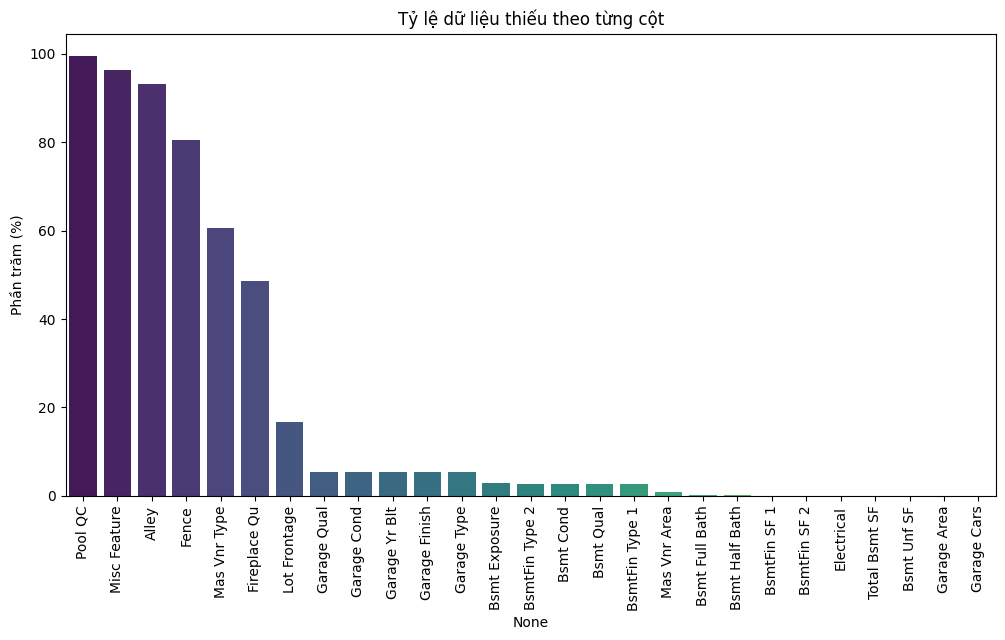

In [120]:
# Tạo báo cáo thông tin về các Mising value 
def report_missing_values(df, threshold=0):
    """ Hàm trả về bảng thống kê các cột bị thiếu dữ liệu.
    threshold: Chỉ hiện các cột thiếu trên % này (mặc định > 0%)
    """
    # 1. Tính tỷ lệ thiếu
    percent_missing = df.isnull().mean() * 100
    
    # 2. Lọc bỏ các cột đầy đủ (0% missing) và sắp xếp giảm dần
    missing_data = percent_missing[percent_missing > threshold].sort_values(ascending=False)
    
    # 3. Trả về DataFrame để hiển thị
    return pd.DataFrame({'Percent Missing (%)': missing_data})

# Gọi hàm
missing_df = report_missing_values(data)
display(missing_df)

# Vẽ biểu đồ trực quan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percent Missing (%)'], palette='viridis',hue=missing_df.index, # Gán hue bằng trục x
                legend=False          # Tắt chú thích tại không thíckkkk
                )
plt.xticks(rotation=90) # Xoay tên chữ thành cột dọc
plt.title('Tỷ lệ dữ liệu thiếu theo từng cột')
plt.ylabel('Phần trăm (%)')
plt.show()



# 🧹 BƯỚC 1: XỬ LÝ DỮ LIỆU THIẾU (DATA CLEANING) 
## Chiến lược: **"NaN = KHÔNG CÓ"**


##  1.1 Thống kê dữ liệu thiếu (Missing Values)

Các cột sau có tỷ lệ dữ liệu trống (Null) **rất cao**, được sắp xếp từ **cao xuống thấp**:

- **Pool QC**: 99.56%
- **Misc Feature**: 96.38%
- **Alley**: 93.24%
- **Fence**: 80.48%
- **Mas Vnr Type**: 60.58%
- **Fireplace Qu**: 48.53%

---

##  1.2 Đánh giá cách làm cũ (Old Method)

### Phương pháp: Loại bỏ hoàn toàn (Drop)

```python
# Kiểm tra giá trị duy nhất (ví dụ: Alley)
data['Alley'].unique()

# Loại bỏ các cột có quá nhiều Null
col_to_drop = [
    'Alley',
    'Mas Vnr Type',
    'Fireplace Qu',
    'Pool QC',
    'Fence',
    'Misc Feature'
]
data = data.drop(columns=col_to_drop)

⚠️ Hạn chế của cách tiếp cận này : NaN không phải lỗi dữ liệu
Trong bài toán bất động sản, NaN thường mang ý nghĩa "Không có" : (không hẻm, không hồ bơi, không lò sưởi, …)
Mất dữ liệu là tín hiệu hiếm (Rare Signals). Các tiện ích như: Thang máy (Elev) Sân tennis (TenC) tuy xuất hiện rất ít (trong Misc Feature) nhưng lại quyết định giá ở phân khúc nhà cao cấp (Luxury).
➡️ Nếu xóa các cột này, mô hình không phân biệt được nhà cấp 4 và biệt thự khi chúng có diện tích tương tự nhau.


## 1.3  Chiến lược xử lý thay thế (New Strategy) ✅ 
🧠 Tư duy cốt lõi: NaN = KHÔNG CÓ => KHÔNG DROP !!! mà xử lý bằng cách :

1. Impute (Điền giá trị)
Thay thế NaN bằng "None" hoặc "No" . Sau đó mã hóa thành biến phân loại (Categorical). Hoặc biến nhị phân (Binary: 0 / 1)
2. Xử lý logic các cột liên quan: Nếu một tiện ích không tồn tại (None) → các thông số số học liên quan phải bằng 0
Quy tắc:  
**Cột Phân loại (Category):** Điền là `'None'` (Đại diện cho nhóm "Không có").
**Cột Số liệu (Numeric):** Điền là `0`.
Để dữ liệu sạch tuyệt đối, ta phải đảm bảo sự đồng bộ giữa "Tên tiện ích" và "Thông số của nó":
- Nếu không có Hồ bơi (`Pool QC = None`)  
  → Diện tích hồ bơi (`Pool Area`) **= 0**
- Nếu không có Gara (`Garage Type = None`)  
  → Diện tích / Số chỗ gara (`Garage Area`, `Garage Cars`) **= 0**
- Nếu không có Tiện ích phụ (`Misc Feature = None`)  
  → Giá trị tiện ích (`Misc Val`) **= 0**

3. Tín hiệu hiếm & Outliers

 Các tiện ích hiếm (Thang máy, Hồ bơi, …): Không loại bỏ. Được xem như tín hiệu giá trị cao. Kết hợp với bước phát hiện Outliers để tránh nhiễu

# CODE XỬ LÝ DỮ LIỆU: 

In [121]:
### =============================================================================
### PHẦN 1: XỬ LÝ DỮ LIỆU THIẾU, LÀM SẠCH DỮ LIỆU (DATA CLEANING)
### =============================================================================
# --- 1. NHÓM CÁC YẾU TỐ CHUNG (General) ---
# Xử lý các tiện ích như Hẻm, Hồ bơi, Hàng rào, Lò sưởi, Tiện ích khác...
cols_general_none = [
    'Alley', 'Mas Vnr Type', 'Fireplace Qu', 
    'Pool QC', 'Fence', 'Misc Feature'
]
# Điền None cho biến chữ
data[cols_general_none] = data[cols_general_none].fillna('None')

# --- BỔ SUNG QUAN TRỌNG: Đồng bộ biến số (Numeric) ---
# Logic: Nếu tiện ích là None -> Thông số kỹ thuật phải là 0
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)  # Diện tích đá ốp
data['Pool Area'] = data['Pool Area'].fillna(0)        # Diện tích hồ bơi
data['Misc Val'] = data['Misc Val'].fillna(0)          # Giá trị tiện ích phụ
data['Fireplaces'] = data['Fireplaces'].fillna(0)      # Số lượng lò sưởi


# --- 2. NHÓM NHÀ XE (Garage) ---
# Logic: Không có Garage -> Các thông tin liên quan là None hoặc 0
cols_garage_none = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
cols_garage_zero = ['Garage Yr Blt', 'Garage Cars', 'Garage Area']

data[cols_garage_none] = data[cols_garage_none].fillna('None')
data[cols_garage_zero] = data[cols_garage_zero].fillna(0)

# --- 3. NHÓM TẦNG HẦM (Basement) ---
# Logic: Không có Tầng hầm -> Các thông tin liên quan là None hoặc 0
cols_bsmt_none = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
    'BsmtFin Type 1', 'BsmtFin Type 2'
]
cols_bsmt_zero = [
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]

data[cols_bsmt_none] = data[cols_bsmt_none].fillna('None')
data[cols_bsmt_zero] = data[cols_bsmt_zero].fillna(0)

# --- 4. KIỂM TRA LẠI (Verification) ---
print("--- Kiểm tra số lượng NaN còn lại sau khi xử lý ---")
# Gom tất cả các cột đã xử lý lại để kiểm tra 1 lần
all_cols_cleaned = (cols_general_none + ['Mas Vnr Area', 'Pool Area', 'Misc Val', 'Fireplaces'] + 
                    cols_garage_none + cols_garage_zero + 
                    cols_bsmt_none + cols_bsmt_zero)

missing_count = data[all_cols_cleaned].isnull().sum().sum()
print(f"Tổng số ô bị thiếu trong các nhóm trên: {missing_count}")

if missing_count == 0:
    print("✅ Đã xử lý sạch sẽ và đồng bộ toàn bộ dữ liệu!")
else:
    print(f"⚠️ CẢNH BÁO: Vẫn còn {missing_count} ô bị thiếu. Hãy kiểm tra lại!")

--- Kiểm tra số lượng NaN còn lại sau khi xử lý ---
Tổng số ô bị thiếu trong các nhóm trên: 0
✅ Đã xử lý sạch sẽ và đồng bộ toàn bộ dữ liệu!



--- Phân phối cột Alley ---
Alley
None    2732
Grvl     120
Pave      78
Name: count, dtype: int64


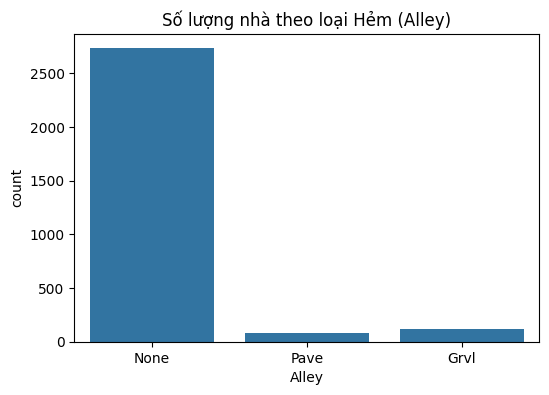


--- Thống kê Tiện ích phụ (Misc Feature) ---
Misc Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64

--- Giá bán trung bình theo tiện ích ---
Misc Feature
TenC    250000.000000
Elev    183850.000000
None    181802.141289
Othr    155625.000000
Shed    152940.621053
Gar2    147500.000000
Name: SalePrice, dtype: float64


In [122]:
### =============================================================================
### PHẦN 2: VÍ DỤ PHÂN TÍCH & TRỰC QUAN HÓA MỘT SỐ YẾU TỐ MINH HỌA (ANALYSIS & VISUALIZATION)
## =============================================================================
# 1. Phân tích cột Alley (Hẻm)
print("\n--- Phân phối cột Alley ---")
print(data['Alley'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Alley', data=data)
plt.title('Số lượng nhà theo loại Hẻm (Alley)')
plt.show()

# 2. Phân tích cột Misc Feature (Tiện ích phụ)
print("\n--- Thống kê Tiện ích phụ (Misc Feature) ---")
print(data['Misc Feature'].value_counts())

# Tính giá bán trung bình theo từng loại tiện ích để xem cái nào đắt giá ,nhằm đánh xem giả thuyết giá nhà phụ thuộc vào các loại tiện ích có hợp lý không
misc_value = data.groupby('Misc Feature')['SalePrice'].mean().sort_values(ascending=False)
print("\n--- Giá bán trung bình theo tiện ích ---")
print(misc_value)

## Kết quả cho thấy giá nhà phụ thuộc rất nhiều vào tiện ích mà nhà đó có :  Sân Tennis (TenC-tennis court),Thang máy (Elev- elevator)

In [123]:
# Kiểm tra lại toàn bộ dữ liệu để hiển thị các cột còn thiếu

# 1. Tính tổng số lượng thiếu
null_counts = data.isnull().sum()

# 2. Lọc: Chỉ lấy những cột có số lượng thiếu > 0
remaining_nulls = null_counts[null_counts > 0]

# 3. Hiển thị kết quả
if remaining_nulls.empty:
    print("Okkkk ! Dữ liệu đã sạch (0 missing values).")
else:
    print("Cảnh báo: Vẫn còn các cột sau bị thiếu dữ liệu: (Sửa sau)")
    print(remaining_nulls.sort_values(ascending=False))

Cảnh báo: Vẫn còn các cột sau bị thiếu dữ liệu: (Sửa sau)
Lot Frontage    490
Electrical        1
dtype: int64


### Lot Frontage

# 🏘️ Chiến lược xử lý Lot Frontage (Mặt tiền lô đất)

### 📊 Thống kê và Vấn đề
**Lot Frontage** (Mặt tiền) thường bị thiếu dữ liệu. Việc xử lý không chính xác biến này sẽ gây sai lệch lớn trong mô hình định giá vì đây là yếu tố ảnh hưởng trực tiếp đến giá trị thương mại của bất động sản.

## 🚫 1. Đánh giá phương pháp cũ (Geometric Assumption) : Giả định lô đất hình vuông

**Code cũ:** `np.sqrt(data['Lot Area'])`

### ⚠️ Tại sao giả định này có thể chưa hợp lý?
* **Giả định hình vuông:** Cách tính này mặc định lô đất là hình vuông (Mặt tiền = Cạnh).
* **Thực tế quy hoạch:** Đất ở (đặc biệt tại Mỹ) thường được quy hoạch theo **hình chữ nhật** (Sâu và Hẹp).
    * *Ví dụ:* Một lô đất 100m² thường có kích thước 5x20m (Mặt tiền 5m). Nếu dùng căn bậc hai, mặt tiền sẽ bị tính lên thành 10m (Sai lệch gấp đôi).
* **Kết quả:** Phương pháp này làm mặt tiền bị "phóng đại" hơn thực tế, dẫn đến nhiễu dữ liệu.

## ✅ 2. Chiến lược mới: Điền theo đặc điểm Khu vực (Neighborhood có các loại IDOTRR = Iowa DOT and Rail Road -gần khu đường sắt),(BrkSide =Brookside = gần suối,SWISU = South & West of Iowa State Univ -= Phía Nam & Tây ĐH Iowa , OldTown == à mà chắc không đắt bằng phố cổ HÀ LỘI được đâu !!)

**Tư duy:** Những ngôi nhà trong cùng một khu phố (Neighborhood) thường tuân theo cùng một quy chuẩn phân lô của đô thị.

> **Nguyên tắc:** Nếu một căn nhà thiếu thông tin mặt tiền, chúng ta sẽ lấy giá trị **Trung vị (Median)** của các căn nhà khác trong cùng **Neighborhood** để điền vào. 

### 🛠️ Cách thực hiện:
1.  **Gom nhóm (Group):** Chia dữ liệu theo từng Khu phố (`Neighborhood`): 
2.  **Tính toán:** Tìm con số trung vị (`Median`) mặt tiền của riêng khu phố đó.
3.  **Lấp đầy:** Điền con số này vào các ô trống tương ứng trong khu phố.





In [124]:
# --- XỬ LÝ DỮ LIỆU 'LOT FRONTAGE' ---
print("🚀 Bắt đầu xử lý Lot Frontage...")

# Bước 1: Điền theo khu phố
# transform(lambda x: ...) sẽ tính median của từng nhóm Neighborhood rồi điền vào ô trống của nhóm đó
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

# Bước 2: Điền nốt các dòng sót lại bằng trung vị toàn cục (Đề phòng trường hợp khu phố trắng dữ liệu)
null_count = data['Lot Frontage'].isnull().sum()
if null_count > 0:
    print(f"⚠️ Còn sót {null_count} dòng, đang xử lý bằng trung vị toàn cục...")
    data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())

# Bước 3: Xác nhận thành công
print(f"✅ Xử lý xong. Số lượng ô trống hiện tại: {data['Lot Frontage'].isnull().sum()}")

🚀 Bắt đầu xử lý Lot Frontage...
⚠️ Còn sót 3 dòng, đang xử lý bằng trung vị toàn cục...
✅ Xử lý xong. Số lượng ô trống hiện tại: 0


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [125]:
## Tổng kiểm tra và Xử lý dứt điểm lần cuối(Final Cleanup) ---

# 1. Kiểm tra những cột còn sót lại (chỉ in những cột > 0)
null_counts = data.isnull().sum()
leftover_nulls = null_counts[null_counts > 0]

print("Các cột còn sót dữ liệu thiếu:")
print(leftover_nulls)

# 2. Xử lý các lỗi lặt vặt (thường gặp trong bộ Ames Housing)
# - Electrical (Hệ thống điện): Thiếu 1 dòng -> Điền loại phổ biến nhất (Mode)
if 'Electrical' in leftover_nulls.index:
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# - Mas Vnr Area (Diện tích ốp đá): Nếu còn sót -> Điền 0
if 'Mas Vnr Area' in leftover_nulls.index:
    data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)

# - Các cột số khác (nếu có): Điền 0
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(0)

# - Các cột chữ khác (nếu có): Điền 'None' (hoặc Mode tùy chọn, ở đây chọn None cho an toàn)
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna('None')

# 3. Khẳng định sạch 100%
print("\n-----------------------------------")
final_check = data.isnull().sum().sum()
if final_check == 0:
    print(f"✅ CHÚC MỪNG! Dữ liệu đã sạch 100% (Giữ nguyên {len(data)} dòng).")
else:
    print(f"⚠️ Vẫn còn {final_check} ô trống cần kiểm tra lại.")

Các cột còn sót dữ liệu thiếu:
Electrical    1
dtype: int64

-----------------------------------
✅ CHÚC MỪNG! Dữ liệu đã sạch 100% (Giữ nguyên 2930 dòng).


In [126]:
# Xem lại thông tin bộ dữ liệu (Tùy ko xem thì thôi :))))))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [127]:
# Tạo ra một bản sao (backup) độc lập của bảng dữ liệu data. Chắc ăn thì copy ko thì thôi luôn . Nếu copy nhớ thay tên cho biến dữ liệu ở code duới mà mất công lắm nên thôi đại đại đi
# data = data.copy()

# 🛠️ BƯỚC 2: KỸ THUẬT ĐẶC TRƯNG (FEATURE ENGINEERING) ==== Group feature -> synthetic features based on domain knowledge
# KỸ THUẬT ĐẶC TRƯNG (FEATURE ENGINEERING)

### 💡 Mục đích: "Biến số liệu thô thành Thông tin giá trị"
Mô hình AI học tốt hơn khi dữ liệu đầu vào phản ánh đúng tư duy định giá của con người.
* **Tổng hợp (Aggregation):** Người mua nhà quan tâm "Tổng diện tích" (`TotalSF`) hơn là diện tích từng tầng riêng lẻ.
* **Chuyển đổi (Transformation):** Thay vì đưa vào "Năm 1990", ta đưa vào "Nhà 30 năm tuổi" (`Age`). Điều này giúp mô hình bắt được quy luật khấu hao tài sản dễ hơn.
* **Quy chuẩn (Standardization):** Gom tất cả các loại phòng tắm (vệ sinh, đầy đủ, dưới hầm...) thành một con số duy nhất (`TotalBath`) giống như trên các trang tin rao vặt (Ví dụ: 2.5 phòng tắm).

### ⚙️ Lưu ý kỹ thuật:
1.  **Phép cộng an toàn:** Khi cộng các cột, nếu 1 ô bị `NaN` (trống) thì kết quả tổng sẽ là `NaN`. Do đó, ta phải dùng `.fillna(0)` đệm vào trước khi cộng.
2.  **Xử lý lỗi chia cho 0:** Khi tính tỷ lệ (Ratio), mẫu số có thể bằng 0. Ta dùng `np.where` để gán kết quả là 0 trong trường hợp đó, tránh báo lỗi `ZeroDivisionError`.
3.  **Loại bỏ các cột không dùng đến:** Các cột `Order` và `PID` chỉ là số thứ tự định danh, không giúp ích gì cho việc dự đoán giá, thậm chí gây nhiễu, nên cần xóa bỏ.

In [128]:
import numpy as np

# --- FEATURE ENGINEERING (TẠO BIẾN & XỬ LÝ AN TOÀN) ---
print("🚀 Đang xử lý tạo biến và làm sạch dữ liệu...")

# ==============================================================================
# 1. TẠO BIẾN MỚI (Dùng .fillna(0) để tránh lỗi cộng với NaN ra NaN)
# ==============================================================================

# 1. TotalSF (Tổng diện tích sàn có mái che)
# Cộng dồn: Hầm + Tầng 1 + Tầng 2
data['TotalSF'] = (data['Total Bsmt SF'].fillna(0) + 
                   data['1st Flr SF'].fillna(0) + 
                   data['2nd Flr SF'].fillna(0))

# 2. TotalFinSF (Tổng diện tích thực dùng chất lượng cao)
# Cộng dồn: Diện tích ở trên mặt đất + Diện tích hầm đã hoàn thiện
data['TotalFinSF'] = (data['Gr Liv Area'].fillna(0) + 
                      data['BsmtFin SF 1'].fillna(0) + 
                      data['BsmtFin SF 2'].fillna(0)) 

# 3. PorchSF (Tổng diện tích phụ ngoài trời/ban công)
data['PorchSF'] = (data['Open Porch SF'].fillna(0) + 
                   data['Enclosed Porch'].fillna(0) + 
                   data['3Ssn Porch'].fillna(0) + 
                   data['Screen Porch'].fillna(0))

# 4. TotalBath (Tổng số phòng tắm)
# Quy ước: Phòng tắm đầy đủ = 1, Nhà vệ sinh (Half Bath) = 0.5
data['TotalBath'] = (data['Full Bath'].fillna(0) + 
                     0.5 * data['Half Bath'].fillna(0) + 
                     data['Bsmt Full Bath'].fillna(0) + 
                     0.5 * data['Bsmt Half Bath'].fillna(0))

# 5. Age (Tuổi thọ nhà tại thời điểm bán)
data['Age'] = data['Yr Sold'] - data['Year Built']

# 6. Bsmt_Fin_Ratio (Tỷ lệ diện tích sử dụng trên tổng diện tích sàn)
# Dùng np.where để xử lý trường hợp TotalSF = 0 (tránh lỗi chia cho 0)
data['Bsmt_Fin_Ratio'] = np.where(data['TotalSF'] > 0,
                                  data['TotalFinSF'] / data['TotalSF'],
                                  0)

# ==============================================================================
# 2. KIỂM TRA & BÁO CÁO (VALIDATION LOOP)
# ==============================================================================
new_features = ['TotalSF', 'TotalFinSF', 'PorchSF', 'TotalBath', 'Age', 'Bsmt_Fin_Ratio']
print("\n--- Báo cáo kiểm tra các biến mới ---")

for feature in new_features:
    null_count = data[feature].isnull().sum()
    if null_count == 0:
        print(f"✅ {feature}: Sạch sẽ (0 NaN)")
    else:
        # Xử lý riêng cho cột Age nếu bị thiếu (do thiếu Year Built)
        if feature == 'Age':
            median_age = data['Age'].median()
            data['Age'] = data['Age'].fillna(median_age)
            print(f"⚠️ {feature}: Có {null_count} dòng NaN -> Đã điền tuổi trung bình ({median_age})")
        else:
            print(f"⚠️ {feature}: Còn sót {null_count} dòng bị NaN -> Cần kiểm tra lại!")

# ==============================================================================
# 3. DỌN DẸP (CLEANUP)
# ==============================================================================
# Xóa cột ID và Order vì đây chỉ là số thứ tự, không mang ý nghĩa dự báo
drop_cols = ['Order', 'PID'] 
data = data.drop(columns=drop_cols, errors='ignore')

print(f"\n✅ Hoàn tất Feature Engineering! Kích thước dữ liệu hiện tại: {data.shape}")
print(data[new_features].head())

🚀 Đang xử lý tạo biến và làm sạch dữ liệu...

--- Báo cáo kiểm tra các biến mới ---
✅ TotalSF: Sạch sẽ (0 NaN)
✅ TotalFinSF: Sạch sẽ (0 NaN)
✅ PorchSF: Sạch sẽ (0 NaN)
✅ TotalBath: Sạch sẽ (0 NaN)
✅ Age: Sạch sẽ (0 NaN)
✅ Bsmt_Fin_Ratio: Sạch sẽ (0 NaN)

✅ Hoàn tất Feature Engineering! Kích thước dữ liệu hiện tại: (2930, 86)
   TotalSF  TotalFinSF  PorchSF  TotalBath  Age  Bsmt_Fin_Ratio
0   2736.0      2295.0       62        2.0   50        0.838816
1   1778.0      1508.0      120        1.0   49        0.848144
2   2658.0      2252.0       36        1.5   52        0.847254
3   4220.0      3175.0        0        3.5   42        0.752370
4   2557.0      2420.0       34        2.5   13        0.946422


# 🔢 BƯỚC 3: MÃ HÓA BIẾN CÓ THỨ TỰ (ORDINAL ENCODING)
## Ordinal Encoding (Mã hóa thứ tự -gán các con số theo một thứ tự tăng dần về giá trị (Chất lượng))


### 💡 Tại sao làm bước này?
Máy tính không hiểu chữ "Xuất sắc" (Ex) tốt hơn "Tốt" (Gd). Nó chỉ hiểu các con số.
Khác với tên đường hay khu phố (không có thứ tự), các biến Chất lượng (Quality/Condition) có tính **thứ bậc** rõ ràng.

* **Cách sai:** Dùng One-Hot Encoding (Tách thành cột `Kitchen_Ex`, `Kitchen_Gd`...). Cách này làm mất đi thông tin so sánh hơn kém.
* **Cách đúng:** Chuyển đổi sang thang điểm số học (Ví dụ: Ex=5, Gd=4, ..., Po=1).

### 🛠️ Chiến lược chấm điểm:
Chúng ta sẽ tự định nghĩa một "Thước đo" (`qual_map`) để áp dụng cho tất cả các cột chất lượng:
* **Ex (Excellent):** 5 điểm (Cao nhất). Giông thang điểm bọn Nga ngố , 2 là tạch tạch tạch rổi🐧🐧🐧
* **Po (Poor):** 1 điểm (Thấp nhất).
* **None/NA (Không có):** 0 điểm. (Điều này cực kỳ quan trọng, giúp máy hiểu "Không có hồ bơi" thấp điểm hơn "Hồ bơi kém").

In [129]:
# ---  CHẤM ĐIỂM CHẤT LƯỢNG (ORDINAL ENCODING) ---
print("🚀 Đang thực hiện mã hóa các biến thứ tự (Quality/Condition)...")

# 1. Định nghĩa thang điểm chuẩn
# Code cũ thường thiếu 'None'. Cần bổ sung thêm vào để máy hiểu "Không có" = 0 điểm.
qual_map = {
    'Ex': 5,      # Excellent (Xuất sắc)
    'Gd': 4,      # Good (Tốt)
    'TA': 3,      # Typical (Cũng cũng)
    'Fa': 2,      # Fair (Dùng tạm)
    'Po': 1,      # Poor (Kém)
    'None': 0,    # Không có tiện ích này (QUAN TRỌNG)
    'No': 0,      # Dự phòng cho trường hợp còn sót chữ "No"
    'NA': 0       # Dự phòng
}

# 2. Danh sách các cột cần chấm điểm
# Bao gồm cả Ngoại thất, Hầm, Lò sưởi, Bếp, Gara và Hồ bơi
ord_cols = [
    'Exter Qual', 'Exter Cond',      # Ngoại thất (Chất lượng & Tình trạng)
    'Bsmt Qual', 'Bsmt Cond',        # Tầng hầm
    'Heating QC',                    # Hệ thống sưởi
    'Kitchen Qual',                  # Nhà bếp
    'Fireplace Qu',                  # Lò sưởi tường
    'Garage Qual', 'Garage Cond',    # Nhà xe
    'Pool QC'                        # Hồ bơi
]

# 3. Thực hiện chuyển đổi
for col in ord_cols:
    # Kiểm tra xem cột có trong data không (tránh lỗi KeyError nếu lỡ tay xóa trước đó)
    if col in data.columns:
        # map() sẽ thay thế chữ bằng số tương ứng trong từ điển
        data[col] = data[col].map(qual_map)
        
        # Lấp các giá trị không có trong map bằng 0 (để an toàn tuyệt đối, tránh sinh ra NaN mới)
        data[col] = data[col].fillna(0)

print("✅ Đã xong! Kiểm tra thử kết quả cột 'Kitchen Qual' (Chất lượng bếp):")
# In ra để kiểm tra xem còn chữ không, hay đã thành số hết rồi
print(data['Kitchen Qual'].value_counts().sort_index())

🚀 Đang thực hiện mã hóa các biến thứ tự (Quality/Condition)...
✅ Đã xong! Kiểm tra thử kết quả cột 'Kitchen Qual' (Chất lượng bếp):
Kitchen Qual
1       1
2      70
3    1494
4    1160
5     205
Name: count, dtype: int64


# 📊 BƯỚC 4: EDA Exploratory Data Analysis _ Phân tích dữ liệu  (CORRELATION ANALYSIS) 

### 💡 Mục đích: Mục tiêu của EDA là dùng các công cụ thống kê và biểu đồ để:

Hiểu cấu trúc: Dữ liệu có bao nhiêu dòng, cột, kiểu dữ liệu gì.
Tìm quy luật: Cái gì làm cho giá nhà tăng? (Ví dụ: Diện tích càng lớn thì giá càng cao).
Phát hiện bất thường (Outliers): Những căn nhà có diện tích siêu lớn nhưng giá lại siêu rẻ (có thể là dữ liệu lỗi).
Kiểm tra giả thuyết: Những yếu tố ta nghĩ là quan trọng (như số phòng ngủ) có thực sự ảnh hưởng đến giá không?

Bước này sử dụng **Ma trận tương quan (Correlation Matrix)** để đo lường mối quan hệ giữa các biến số với `SalePrice`.

### 🔍 Cách đọc chỉ số tương quan (r):
Hệ số `r` chạy từ -1 đến +1:
* **r càng gần 1:** Tương quan dương cực mạnh (Ví dụ: Diện tích càng lớn $\rightarrow$ Giá càng cao).
* **r càng gần -1:** Tương quan âm cực mạnh (Ví dụ: Nhà càng cũ $\rightarrow$ Giá càng thấp).
* **r gần 0:** Không liên quan gì nhau.

### 🛠️ Chiến lược:
Chúng ta sẽ tính toán và vẽ biểu đồ **Top 20 yếu tố** có ảnh hưởng lớn nhất. Đây chính là những "gợi ý" để chọn làm đầu vào cho mô hình máy học sau này.

🚀 Đang tính toán ma trận tương quan...

--- Top 20 yếu tố ảnh hưởng mạnh nhất đến Giá nhà ---
SalePrice         1.000000
Overall Qual      0.799262
TotalSF           0.793127
TotalFinSF        0.731478
Gr Liv Area       0.706780
Exter Qual        0.697970
Kitchen Qual      0.672914
Garage Cars       0.647562
Garage Area       0.640138
TotalBath         0.636175
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Bsmt Qual         0.607532
Year Built        0.558426
Full Bath         0.545604
Fireplace Qu      0.533901
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Heating QC        0.450325
Name: SalePrice, dtype: float64


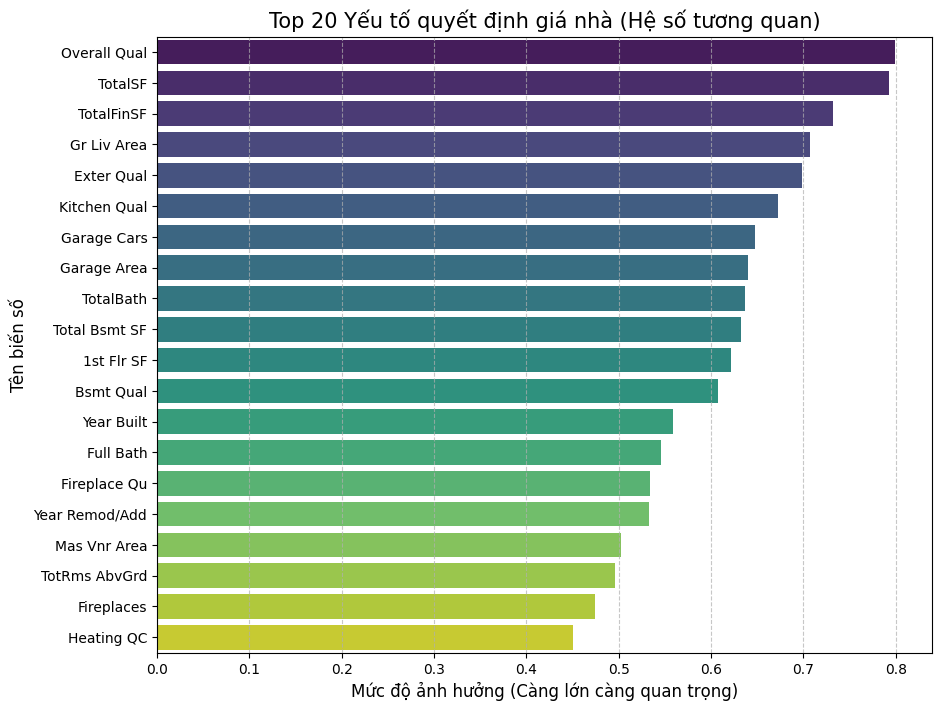

In [130]:
# --- TÍNH TOÁN MỨC ĐỘ ẢNH HƯỞNG (CORRELATION) ---

print("🚀 Đang tính toán ma trận tương quan...")

# 1. Tính ma trận tương quan giữa các biến số
# Lưu ý quan trọng: Phải thêm numeric_only=True để chỉ tính trên các cột số, tránh lỗi crash khi gặp các cột dữ liệu chữ (Text)
corr_matrix = data.corr(numeric_only=True)

# 2. Lấy danh sách độ tương quan với cột Giá nhà (SalePrice)
# Sắp xếp giảm dần (Cao nhất ở trên)
corre_fea = corr_matrix['SalePrice'].sort_values(ascending=False)

# 3. In ra Top 21 (Bao gồm chính nó và 20 yếu tố khác)
print("\n--- Top 20 yếu tố ảnh hưởng mạnh nhất đến Giá nhà ---")
# Tại sao lấy 21???   Vì dòng đầu tiên luôn là SalePrice (tương quan với chính nó = 1)
print(corre_fea.head(21))

# --- (ĐẶT KÍCH CỠ TO NHÌN CHO DỄ  :V) ---
plt.figure(figsize=(10, 8))

# Lấy Top 20 (bỏ dòng đầu tiên là SalePrice đi vì nó luôn là 1, lấy làm chi nữa)
top_features = corre_fea.iloc[1:21] 

# Vẽ biểu đồ cột ngang
# hue=top_features.index và legend=False giúp màu sắc đẹp hơn và tắt chú thích thừa
sns.barplot(x=top_features.values, y=top_features.index, 
            hue=top_features.index, palette='viridis', legend=False)

plt.title('Top 20 Yếu tố quyết định giá nhà (Hệ số tương quan)', fontsize=15)
plt.xlabel('Mức độ ảnh hưởng (Càng lớn càng quan trọng)', fontsize=12)
plt.ylabel('Tên biến số', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Thêm lưới mờ cho dễ nhìn
plt.show()

### Lưu ý : Theo một số thông tin từ các bài báo liên quan đến bất động sản, thì:
    'RL': 'Residential Low Density (Mật độ thấp)',
    'RM': 'Residential Medium Density (Mật độ trung bình)',
    'RH': 'Residential High Density (Mật độ cao)',
    'FV': 'Floating Village (Làng nổi)',
    'C (all)': 'Commercial (Thương mại)',
    'I': 'Industrial (Công nghiệp)',
    'A': 'Agricultural (Nông nghiệp)'

# 📈 BƯỚC 5: TRỰC QUAN HÓA TƯƠNG QUAN (DIỆN TÍCH vs GIÁ BÁN)

### 💡 Mục đích:
Chúng ta muốn kiểm chứng bằng mắt thường mối quan hệ giữa **Tổng diện tích (`TotalSF`)** và **Giá bán (`SalePrice`)**.
* **Kỳ vọng:** Một đường xu hướng đi lên (Positive Correlation) - Diện tích tăng thì Giá tăng.
* **Phân nhóm:** Sử dụng màu sắc (`hue`) để xem các khu vực quy hoạch (`MS Zoning`) khác nhau thì giá cả phân bố thế nào (Ví dụ: Khu mật độ thấp `RL` thường là nhà to và đắt hơn khu mật độ cao `RM`).

### ⚠️ Lưu ý quan sát:
Nếu thấy những điểm nằm quá xa so với đám đông (Outliers) - ví dụ: Nhà diện tích cực lớn nhưng giá lại rẻ bất thường, chúng ta cần lưu ý vì đó có thể là dữ liệu nhiễu làm sai lệch mô hình.

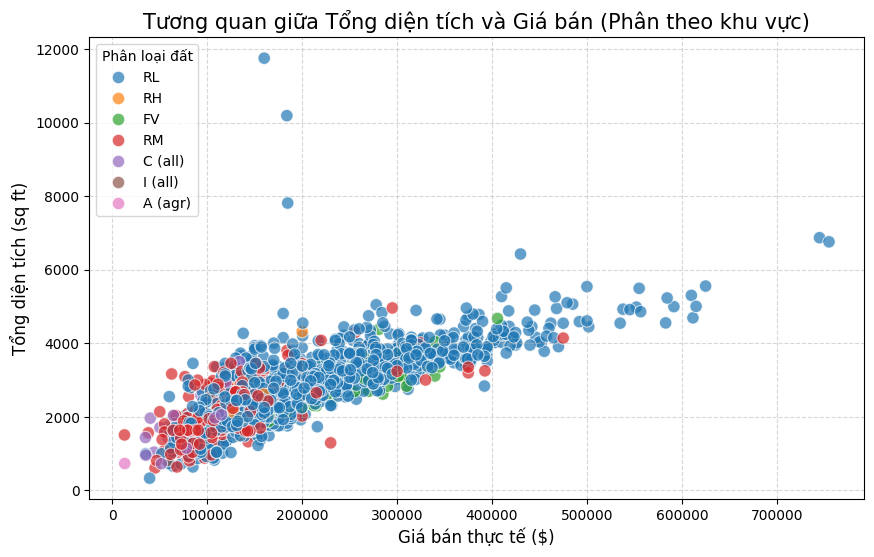

In [131]:
# Vẽ biểu đổ scatter tương quan diện tích và giá bán
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ: Trục X là Giá tiền, Trục Y là Diện tích
# hue='MS Zoning': Tô màu khác nhau cho từng loại quy hoạch đất
sns.scatterplot(data=data, x='SalePrice', y='TotalSF', hue='MS Zoning', alpha=0.7, s=80)

# Trang trí biểu đồ
plt.title('Tương quan giữa Tổng diện tích và Giá bán (Phân theo khu vực)', fontsize=15)
plt.xlabel('Giá bán thực tế ($)', fontsize=12)
plt.ylabel('Tổng diện tích (sq ft)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Phân loại đất', loc='upper left')

plt.show()

# 🧹 BƯỚC 6: LOẠI BỎ DỮ LIỆU NHIỄU (OUTLIER REMOVAL)

### 🚨 Vấn đề phát hiện từ biểu đồ:
Quan sát biểu đồ tán xạ ở trên, ta thấy xuất hiện một vài điểm dữ liệu bất thường:
* **Đặc điểm:** Những căn nhà có **Tổng diện tích cực lớn (> 7,500 sq ft)** nhưng giá bán lại **rất thấp (< $300,000)**.
* **Nguyên nhân:** Đây có thể là đất nông nghiệp, nhà xưởng, hoặc giao dịch nội bộ không theo giá thị trường.

### ✂️ Giải pháp:
Những điểm này là **Ngoại lai (Outliers)**. Chúng không đại diện cho quy luật chung của thị trường nhà ở.
Nếu giữ lại, chúng sẽ làm "méo" đường hồi quy, khiến mô hình dự đoán sai cho các căn nhà bình thường.
$\rightarrow$ **Quyết định:** Loại bỏ các dòng này khỏi bộ dữ liệu để mô hình học chuẩn hơn.

🚀 Đang quét và xử lý dữ liệu ngoại lai...
⚠️ Phát hiện 3 căn nhà ngoại lai cần loại bỏ:
      TotalSF  SalePrice Neighborhood
1498  11752.0     160000      Edwards
2180  10190.0     183850      Edwards
2181   7814.0     184750      Edwards

✅ Đã xóa xong. Biểu đồ sạch sẽ trông như thế này:


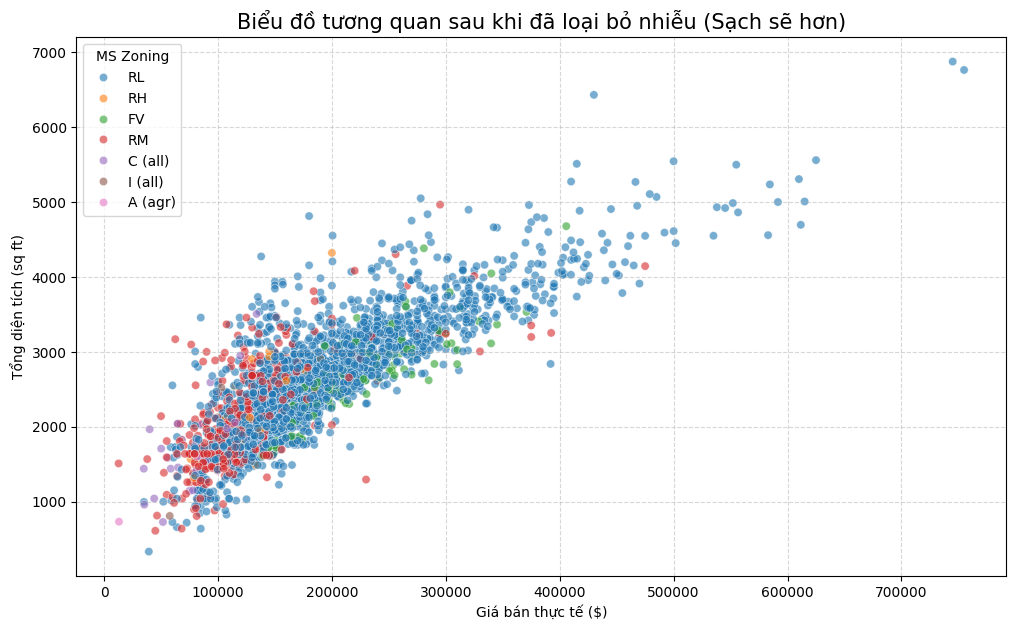

In [132]:
# --- LOẠI BỎ OUTLIERS (NGOẠI LAI) ---
print("🚀 Đang quét và xử lý dữ liệu ngoại lai...")

# 1. Xác định các căn nhà "dị biệt"
# Điều kiện: Diện tích siêu to (> 7500) NHƯNG Giá lại rẻ (< 300,000)
# Lưu ý: Ngưỡng 7500 này được xác định dựa trên quan sát biểu đồ TotalSF vs SalePrice ở bước trước
outliers = data[(data['TotalSF'] > 7500) & (data['SalePrice'] < 300000)]

print(f"⚠️ Phát hiện {len(outliers)} căn nhà ngoại lai cần loại bỏ:")
if len(outliers) > 0:
    print(outliers[['TotalSF', 'SalePrice', 'Neighborhood']])
else:
    print("Không tìm thấy ngoại lai nào theo ngưỡng này.")

# 2. Loại bỏ chúng khỏi tập dữ liệu
# Dùng .index để xóa chính xác các dòng này
data = data.drop(outliers.index)

# 3. Vẽ lại biểu đồ để kiểm chứng (Double Check)
print("\n✅ Đã xóa xong. Biểu đồ sạch sẽ trông như thế này:")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(data=data, x='SalePrice', y='TotalSF', hue='MS Zoning', alpha=0.6)
plt.title("Biểu đồ tương quan sau khi đã loại bỏ nhiễu (Sạch sẽ hơn)", fontsize=15)
plt.xlabel('Giá bán thực tế ($)')
plt.ylabel('Tổng diện tích (sq ft)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 🏠 BƯỚC 7: PHÂN TÍCH ĐA CHIỀU (GIÁ vs DIỆN TÍCH vs KIỂU NHÀ)
## Cùng một diện tích, kiểu nhà nào thường bán được giá cao hơn nhể ??? !!!
### 💡 Mục đích:
Chúng ta đã biết mối tương quan thuận giữa Diện tích và Giá. Nhưng liệu **Kiểu kiến trúc (House Style)** có tác động gì không?
Biểu đồ này thêm một lớp thông tin thứ 3 (Màu sắc) để trả lời các câu hỏi:
* Nhà 2 tầng (`2Story`) có xu hướng diện tích lớn hơn nhưng giá có cao tương ứng không?
* Nhà 1 tầng (`1Story`) phân bố thế nào so với các loại nhà lệch tầng (`SLvl`, `SFoyer`)?

### 🎨 Kỹ thuật trực quan hóa:
* **Hue (Màu sắc):** Dùng để phân loại dữ liệu theo nhóm (Categorical Data).
* **Alpha (Độ trong suốt):** Giúp nhìn thấy mật độ dữ liệu ở những vùng có nhiều điểm đè lên nhau.
* **Legend Outside:** Đưa chú thích ra ngoài khung hình để không che mất các điểm dữ liệu quan trọng.

Note:
- 1Story - 1 tầng
- 2Story - 2 tầng
- 1.5Fin - 1 tầng có gác mái hoàn thiện
- 1.5Unf - 1 tầng có gác mái chưa hoàn thiện
- 2.5Fin- 2 tầng có gác mái hoàn thiện
- 2.5Unf - 2 tầng có gác mái chưa hoàn thiện
- SFoyer - nhà kiểu 1 tầng nhưng có cầu thang trong nhà tạo thành 2 tầng
- SLvl - nhà bên trong có các tầng chằng chéo

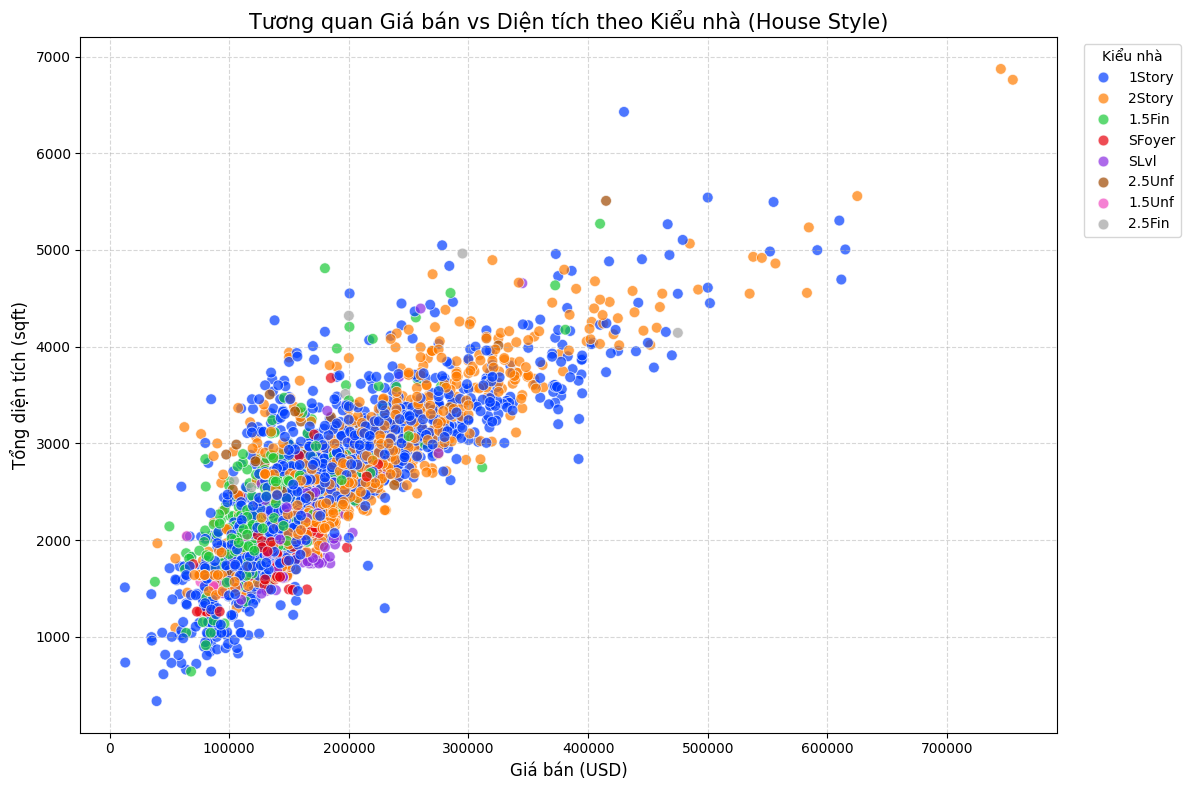

In [133]:
# --- VẼ BIỂU ĐỒ PHÂN TÍCH THEO KIỂU NHÀ (HOUSE STYLE) ---


plt.figure(figsize=(12, 8)) 

# Vẽ biểu đồ Scatter
sns.scatterplot(data=data, 
                x='SalePrice', 
                y='TotalSF', 
                hue='House Style', # Phân loại màu sắc theo Kiểu nhà
                palette='bright',  # Dùng bảng màu tươi sáng cho dễ phân biệt
                alpha=0.7,         # Độ trong suốt 0.7 để nhìn thấy các điểm đè lên nhau
                s=60)              # Kích thước điểm

# Trang trí biểu đồ
plt.title('Tương quan Giá bán vs Diện tích theo Kiểu nhà (House Style)', fontsize=15)
plt.xlabel('Giá bán (USD)', fontsize=12)
plt.ylabel('Tổng diện tích (sqft)', fontsize=12)

# Đưa chú thích (Legend) ra ngoài biểu đồ cho đỡ che hình 🐧🕶️ 🐧🕶️ 🐧🕶️ 🐧🕶️ 🐧🕶️ 🐧🕶️ 🐧🕶️ 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Kiểu nhà', frameon=True)
plt.grid(True, linestyle='--', alpha=0.5) # Thêm lưới mờ cho dễ gióng số

plt.tight_layout() # Tự động căn chỉnh lề cho đẹpppppppppp
plt.show()

# 💎 BƯỚC 8: PHÂN TÍCH TÁC ĐỘNG CỦA CHẤT LƯỢNG (OVERALL QUALITY)

### 💡 Mục đích:
Diện tích không phải là tất cả. Một căn nhà nhỏ nhưng xây dựng đẳng cấp (Chất lượng 10/10) vẫn có thể đắt hơn một căn biệt thự rộng lớn nhưng xây cẩu thả.
Biểu đồ này thêm chiều thông tin thứ 3 là **Chất lượng tổng thể (`Overall Qual`)** thông qua màu sắc.

### 🔍 Đọc biểu đồ:
* **Màu sáng (Vàng/Xanh lá):** Đại diện cho chất lượng cao (8-10 điểm).
* **Màu tối (Tím/Đen):** Đại diện cho chất lượng thấp (1-4 điểm).
* **Quy luật kỳ vọng:** Với cùng một mức diện tích (cùng chiều cao trục Y), các điểm màu sáng (nhà xịn) sẽ nằm lệch về phía bên phải (giá cao hơn) so với các điểm màu tối.

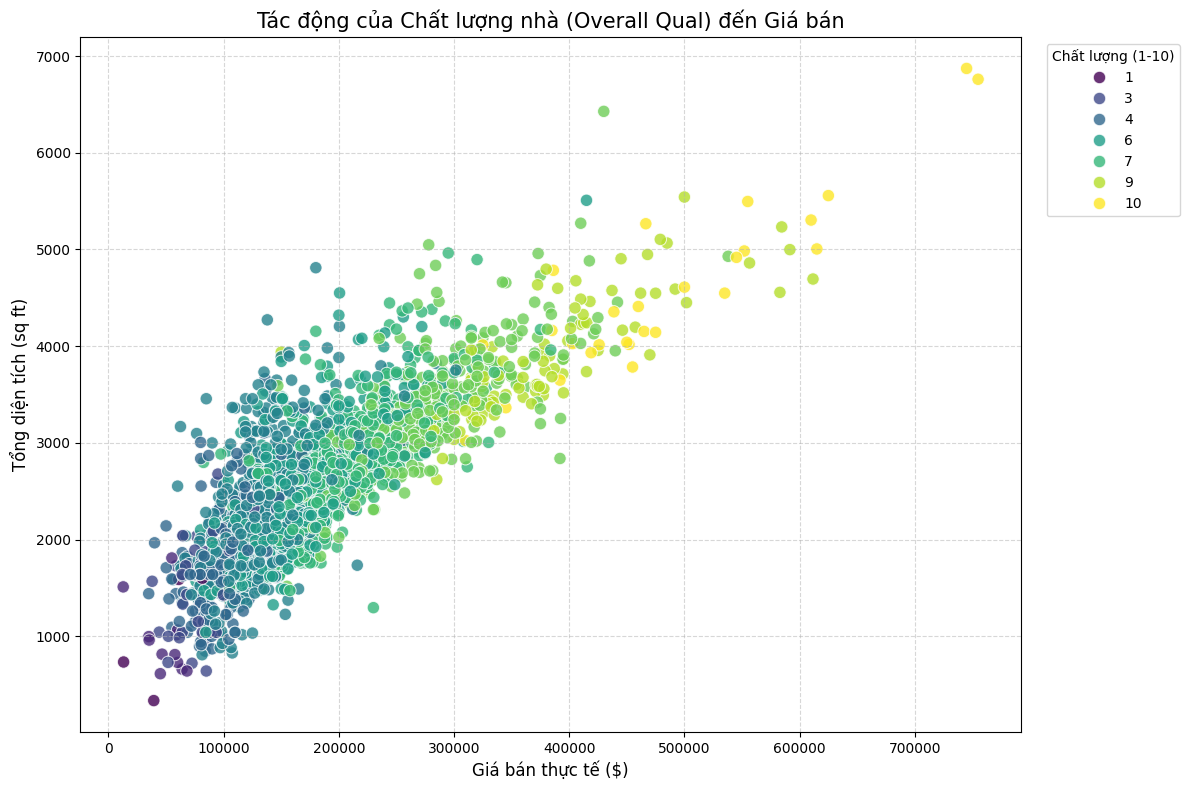

In [ ]:
# Biểu đồ phân tán (Scatter Plot) giúp nhìn thấy mối quan hệ giữa 3 yếu tố cùng một lúc: Giá tiền, Diện tích và Chất lượng nhà.
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ Scatter
# hue='Overall Qual': Tô màu theo điểm chất lượng (1 đến 10)
# palette='viridis': Dùng dải màu từ Tím (Thấp) -> Vàng (Cao) để dễ nhìn sự chuyển cấp
sns.scatterplot(data=data, 
                x='SalePrice', 
                y='TotalSF', 
                hue='Overall Qual', 
                palette='viridis', 
                s=80, alpha=0.8)

# Trang trí
plt.title('Tác động của Chất lượng nhà (Overall Qual) đến Giá bán', fontsize=15)
plt.xlabel('Giá bán thực tế ($)', fontsize=12)
plt.ylabel('Tổng diện tích (sq ft)', fontsize=12)

# Hiển thị chú thích (Legend)
plt.legend(title='Chất lượng (1-10)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 📊 BƯỚC 9: KIỂM TRA PHÂN PHỐI GIÁ NHÀ (TARGET ANALYSIS). XEM BỊ LỆCH (SKEWED) KO? NẾU CÓ CẦN ÁP DỤNG LOG TRANSFORM ĐỂ NẮN LẠI

### 💡 Mục đích:
Trong thống kê và học máy, **Phân phối chuẩn (Normal Distribution)** là trạng thái lý tưởng.
* **Hình dạng:** Giống quả chuông úp (Bell Curve) đối xứng.
* **Ý nghĩa:** Dữ liệu tập trung ở giữa, ít giá trị cực đoan.

Tuy nhiên, dữ liệu giá nhà thực tế thường bị **Lệch (Skewed)**.
* **Lệch phải (Positive Skew):** Đa số nhà có giá rẻ/trung bình, nhưng có một số ít căn biệt thự siêu đắt kéo cái "đuôi" biểu đồ dài về bên phải.
* **Hậu quả:** Nếu để nguyên, mô hình sẽ học rất tốt ở phân khúc giá rẻ nhưng dự đoán sai lệch lớn ở phân khúc giá cao.

### 🛠️ Cách thực hiện:
Chúng ta sẽ vẽ đè đường cong chuẩn lý thuyết (Màu đen) lên trên biểu đồ thực tế (Màu xanh).
* Nếu hai đường này khớp nhau $\rightarrow$ Tuyệt vời.
* Nếu đường xanh bị lệch hẳn sang một bên $\rightarrow$ Cần dùng kỹ thuật **Log Transform** để "nắn" lại.

🚀 Đang vẽ biểu đồ phân phối...


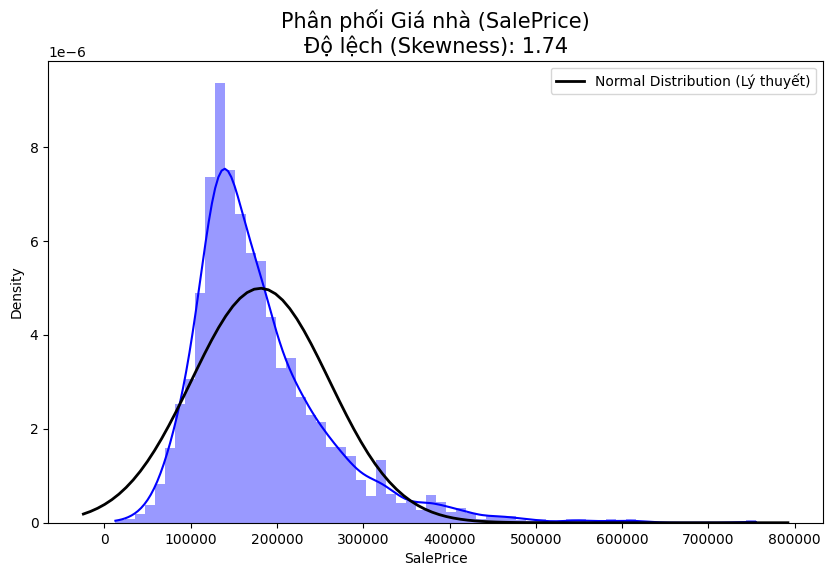

⚠️ Dữ liệu bị lệch khá nhiều (1.74). Cần cân nhắc Log Transform ở bước sau!


In [135]:
# --- KIỂM TRA PHÂN PHỐI CỦA GIÁ NHÀ ---
from scipy.stats import norm

print("🚀 Đang vẽ biểu đồ phân phối...")

# 1. Vẽ biểu đồ Histogram (Biểu đồ tần suất)
plt.figure(figsize=(10, 6))
# kde=True: Vẽ đường cong mật độ thực tế của dữ liệu
sns.histplot(data['SalePrice'], kde=True, stat="density", linewidth=0, color='blue', alpha=0.4)

# 2. Vẽ đường cong chuẩn (Normal Distribution) lý thuyết để so sánh
# Mục đích: Xem hình "chuông" thực tế (màu xanh) lệch thế nào so với hình "chuông" lý tưởng (màu đen)
mu, std = norm.fit(data['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution (Lý thuyết)')

# 3. Tính độ lệch (Skewness)
skewness = data['SalePrice'].skew()
plt.title(f"Phân phối Giá nhà (SalePrice)\nĐộ lệch (Skewness): {skewness:.2f}", fontsize=15)
plt.legend()
plt.show()

# Đánh giá nhanh
if abs(skewness) > 0.5:
    print(f"⚠️ Dữ liệu bị lệch khá nhiều ({skewness:.2f}). Cần cân nhắc Log Transform ở bước sau!")
else:
    print(f"✅ Dữ liệu khá cân bằng ({skewness:.2f}).")

# 📉 BƯỚC 10: CHUẨN HÓA PHÂN PHỐI GIÁ (LOG TRANSFORMATION)

### 💡 Vấn đề:
Biểu đồ trên cho thấy `SalePrice` bị lệch (Skew). Điều này có nghĩa là có một số ít căn nhà giá cực cao đang kéo lệch giá trị trung bình, làm cho mô hình dễ bị "nhiễu".

### 💊 Giải pháp: Log Transformation
Chúng ta sẽ áp dụng hàm Logarit tự nhiên (`ln`) lên cột giá nhà.
* **Tác dụng:** Logarit có tính chất "co ngắn" các khoảng cách lớn. Nó sẽ kéo những căn nhà giá siêu cao xích lại gần hơn với mức trung bình.
* **Hàm sử dụng:** `np.log1p(x) = log(1 + x)`.
    * Tại sao không dùng `log(x)`? Vì nếu có giá trị bằng 0, `log(0)` sẽ gây lỗi (vô cực). `log1p` an toàn hơn.

### 🎯 Kỳ vọng:
Sau khi biến đổi, biểu đồ tần suất sẽ trở nên cân đối hơn (độ lệch `skewness` giảm về gần 0). Đây là trạng thái "dễ xử lý" nhất cho các thuật toán Hồi quy tuyến tính.

🚀 Đang thực hiện Log Transform cho biến mục tiêu SalePrice...
📊 Độ lệch (Skewness) trước khi xử lý: 1.74
✅ Độ lệch sau khi xử lý: -0.01 (Tốt hơn rất nhiều!)


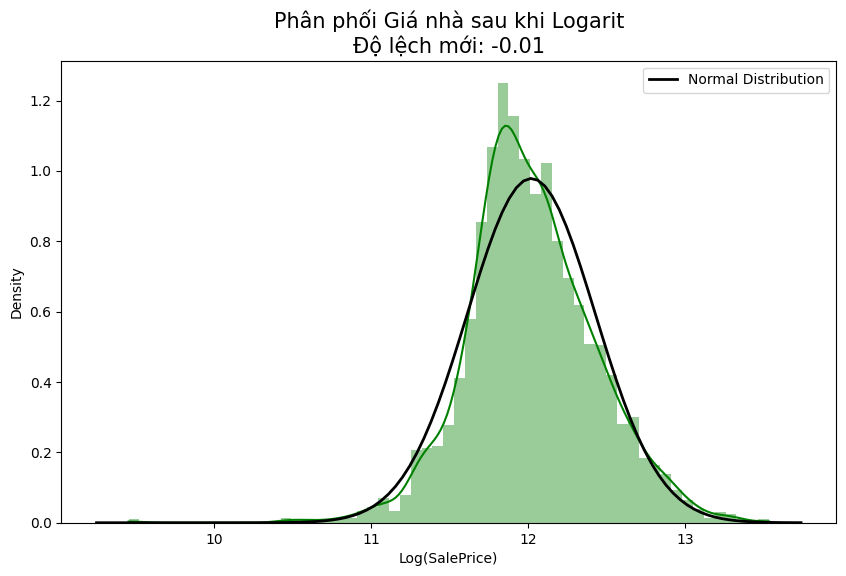

In [136]:
# --- CHUẨN HÓA DỮ LIỆU BẰNG LOGARIT ---

print("🚀 Đang thực hiện Log Transform cho biến mục tiêu SalePrice...")
print(f"📊 Độ lệch (Skewness) trước khi xử lý: {data['SalePrice'].skew():.2f}")

# 1. Áp dụng hàm log1p (log(1+x)) 
# Biến đổi này giúp co ngắn cái đuôi dài bên phải lại, đưa phân phối về gần chuẩn hơn
data['SalePrice'] = np.log1p(data['SalePrice'])

# 2. Kiểm tra lại độ lệch sau khi biến đổi
new_skew = data['SalePrice'].skew()
print(f"✅ Độ lệch sau khi xử lý: {new_skew:.2f} (Tốt hơn rất nhiều!)")

# 3. Vẽ lại biểu đồ phân phối để xem kết quả
plt.figure(figsize=(10, 6))

# Vẽ Histogram mới
sns.histplot(data['SalePrice'], kde=True, stat="density", linewidth=0, color='green', alpha=0.4)

# Vẽ đường cong chuẩn lý thuyết mới
mu, std = norm.fit(data['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title(f"Phân phối Giá nhà sau khi Logarit\nĐộ lệch mới: {new_skew:.2f}", fontsize=15)
plt.xlabel('Log(SalePrice)')
plt.legend()
plt.show()

# 📉 BƯỚC 11: CHUẨN HÓA CÁC BIẾN ĐẦU VÀO KHÁC (NGOÀI SALEPRICE)

### 💡 Tại sao cần làm thêm bước này?
Chúng ta đã xử lý xong biến mục tiêu (`SalePrice`), nhưng còn các biến đầu vào (Features) thì sao?
Các thuật toán tuyến tính hoạt động tốt nhất khi **cả đầu vào và đầu ra** đều có dạng hình quả chuông (Phân phối chuẩn).

Thực tế, các biến đo lường như **Diện tích (`LotArea`, `GrLivArea`)** hay **Khoảng cách** thường bị lệch rất nặng (Skewed).
* Ví dụ: Đa số nhà có diện tích 100m2, nhưng có vài nhà 5000m2.

### 🛠️ Quy trình tự động hóa:
1.  **Quét:** Duyệt qua tất cả các cột số.
2.  **Đo:** Tính độ lệch (`Skewness`) của từng cột.
3.  **Lọc:** Chọn ra những cột bị lệch quá ngưỡng cho phép (thường là `> 0.75`).
4.  **Sửa:** Áp dụng hàm `log1p` cho danh sách này.

In [137]:
# --- XỬ LÝ LOG CHO CÁC BIẾN ĐẦU VÀO (FEATURES) ---
from scipy.stats import skew

print("🚀 Đang quét độ lệch của các biến đầu vào...")

# 1. Lấy danh sách các cột số (trừ SalePrice ra vì đã xử lý rồi)
numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_feats = numeric_feats.drop("SalePrice") if "SalePrice" in numeric_feats else numeric_feats

# 2. Tính độ lệch (skewness) của từng cột
# dropna() để tránh lỗi với các giá trị null còn sót (nếu có)
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# 3. Chọn các cột bị lệch nhiều (skew > 0.75 là ngưỡng phổ biến trong thống kê)
skewness_df = pd.DataFrame({'Skew': skewed_feats})
high_skew_feats = skewness_df[abs(skewness_df['Skew']) > 0.75].index

print(f"⚠️ Đã phát hiện {len(high_skew_feats)} biến bị lệch (Skew > 0.75).")
print(f"🔍 Top 5 biến lệch nhất: \n{skewness_df.head(5)}")

print("\n🔄 Đang thực hiện Log Transform...")
# 4. Áp dụng log1p cho các cột này
for feat in high_skew_feats:
    data[feat] = np.log1p(data[feat])

print("✅ Đã hoàn tất Log Transform cho toàn bộ Features!")

🚀 Đang quét độ lệch của các biến đầu vào...
⚠️ Đã phát hiện 30 biến bị lệch (Skew > 0.75).
🔍 Top 5 biến lệch nhất: 
                      Skew
Misc Val         22.221198
Pool Area        17.719247
Pool QC          17.156160
Lot Area         13.178732
Low Qual Fin SF  12.105635

🔄 Đang thực hiện Log Transform...
✅ Đã hoàn tất Log Transform cho toàn bộ Features!


# 🔢 BƯỚC 12: MÃ HÓA ONE-HOT (ONE-HOT ENCODING)

### 💡 Vấn đề:
Máy tính không biết đọc chữ. Nó không hiểu `Neighborhood = 'OldTown'` nghĩa là gì.
Chúng ta cần chuyển đổi các biến phân loại (Categorical) thành dạng số.

### 🛠️ Giải pháp: One-Hot Encoding
Kỹ thuật này sẽ "xé nhỏ" một cột phân loại thành nhiều cột nhị phân (0 và 1).
* **Ví dụ:** Cột `Màu sắc` có 3 giá trị: Đỏ, Xanh, Vàng.
* **Sau khi biến đổi:** Sẽ thành các cột `Màu_Đỏ`, `Màu_Xanh`. (Nếu cả 2 đều bằng 0 thì tự hiểu là Vàng).

### ⚠️ Tại sao dùng `drop_first=True`?
Để tránh **Bẫy Đa Cộng Tuyến (Dummy Variable Trap)**.
Ví dụ nếu ta có 2 giới tính (Nam, Nữ), ta chỉ cần 1 cột `Là_Nam` (1=Có, 0=Không) là đủ. Nếu thêm cột `Là_Nữ` nữa thì thông tin bị dư thừa (Trùng lặp 100%).
$\rightarrow$ `drop_first=True` sẽ xóa bỏ cột đầu tiên của mỗi nhóm để mô hình gọn nhẹ và chính xác hơn.

In [138]:
# --- ONE-HOT ENCODING (BIẾN ĐỔI CHỮ THÀNH SỐ) ---
import pandas as pd

print("🚀 Đang thực hiện One-Hot Encoding...")
print(f"📊 Số lượng cột ban đầu: {data.shape[1]}")

# 1. Thực hiện biến đổi
# pd.get_dummies: Tự động tìm tất cả các cột object và biến thành cột số 0-1
# drop_first=True: Loại bỏ cột đầu tiên của mỗi nhóm để tránh đa cộng tuyến (Rất quan trọng cho Linear Regression)
final_data = pd.get_dummies(data, drop_first=True)

print(f"✅ Số lượng cột sau khi xử lý: {final_data.shape[1]}")

# 2. Kiểm tra lại lần cuối
# Nếu danh sách in ra rỗng [] nghĩa là không còn cột chữ nào -> Thành công
remaining_objects = final_data.select_dtypes(include=['object']).columns.tolist()

if len(remaining_objects) == 0:
    print("🎉 Dữ liệu đã sạch 100% (Toàn bộ là số). Sẵn sàng huấn luyện!")
else:
    print(f"⚠️ Vẫn còn sót các cột chữ: {remaining_objects}")

# Xem thử 5 dòng đầu của dữ liệu "thành phẩm"
final_data.head()

🚀 Đang thực hiện One-Hot Encoding...
📊 Số lượng cột ban đầu: 86
✅ Số lượng cột sau khi xử lý: 246
🎉 Dữ liệu đã sạch 100% (Toàn bộ là số). Sẵn sàng huấn luyện!


MS SubClass  Lot Frontage   Lot Area  Overall Qual  Overall Cond  \
0     3.044522      4.955827  10.366309             6             5   
1     3.044522      4.394449   9.360741             5             6   
2     3.044522      4.406719   9.565775             6             6   
3     3.044522      4.543295   9.320181             7             5   
4     4.110874      4.317488   9.534668             5             5   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0        1960            1960      4.727388    1.386294    1.386294  ...   
1        1961            1961      0.000000    1.386294    1.386294  ...   
2        1958            1958      4.691348    1.386294    1.386294  ...   
3        1968            1968      0.000000    1.609438    1.386294  ...   
4        1997            1998      0.000000    1.386294    1.386294  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False          False   
3            False          False          False          False   
4            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False                  False   
1           True                   False                  False   
2           True                   False                  False   
3           True                   False                  False   
4           True                   False                  False   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                  False                   True                   False  
1                  False                   True                   False  
2                  False                   True                   False  
3                  False                   True                   False  
4                  False                   True                   False  

[5 rows x 246 columns]

# 🌟 BƯỚC MỞ RỘNG: TẠO BIẾN "TỔNG CHẤT LƯỢNG" (TOTAL QUALITY SCORE)

### 💡 Ý tưởng:
Thay vì để mô hình tự mày mò từng mảnh nhỏ (Bếp đẹp, Gara xấu, Hầm trung bình...), chúng ta tạo ra một chỉ số tổng hợp gọi là **`Total_Qua`**.

### 🧮 Công thức:
$$\text{Total\_Qua} = \text{Overall Qual} + \text{Exter Qual} + \text{Kitchen Qual} + \text{Bsmt Qual} + \text{Garage Qual}$$

### 🎯 Tác dụng:
* **Tăng sức mạnh dự báo:** Những căn nhà có `Total_Qua` cao chắc chắn là những ngôi nhà "Siêu phẩm" (Luxury) và giá sẽ rất cao.
* **Giảm nhiễu:** Tổng hợp lại giúp giảm bớt ảnh hưởng của việc đánh giá sai lệch ở một tiêu chí đơn lẻ nào đó.

⚠️ **Lưu ý:** Bước này chỉ thực hiện được **SAU KHI** đã chuyển đổi các cột chất lượng từ chữ sang số (Ordinal Encoding)!!!

🚀 Đang tính toán chỉ số Total_Qua...
🏆 Top 5 căn nhà có điểm chất lượng cao nhất:
      Total_Qua  SalePrice Neighborhood
456   19.969813  13.221305      NridgHt
1642  19.969813  13.028055      StoneBr
1780  19.969813  12.945641      Somerst
1767  19.969813  13.534474      NoRidge
447   19.969813  12.864243      NridgHt


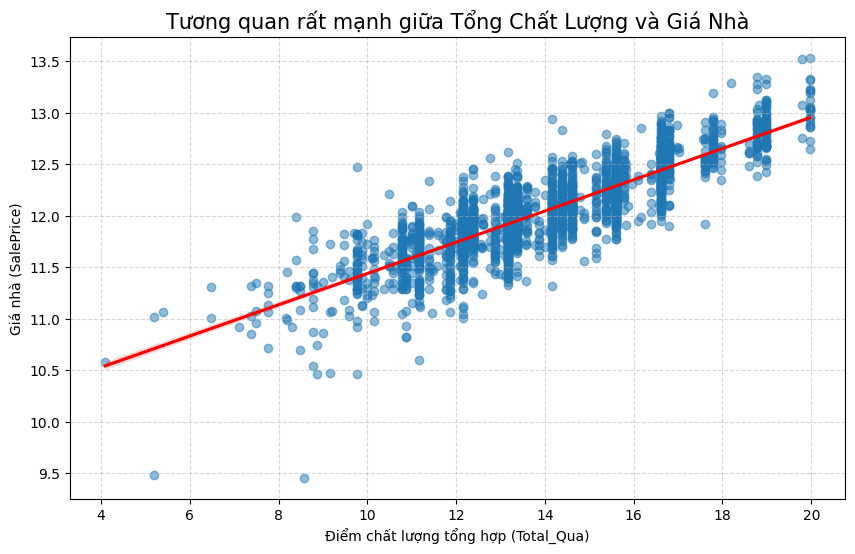

✅ Hệ số tương quan của biến mới này với giá nhà là: 0.8529 (Rất cao!)


In [139]:
# --- TẠO BIẾN TOTAL QUALITY (TỔNG CHẤT LƯỢNG) ---

print("🚀 Đang tính toán chỉ số Total_Qua...")

# 1. Tính tổng điểm chất lượng
# Lưu ý: Các cột này phải là số (đã qua bước Ordinal Encoding)
data['Total_Qua'] = (data['Overall Qual'] + 
                     data['Exter Qual'] + 
                     data['Kitchen Qual'] + 
                     data['Bsmt Qual'] + 
                     data['Garage Qual'])

# 2. Kiểm tra thử xem nhà nào chất lượng cao nhất
print("🏆 Top 5 căn nhà có điểm chất lượng cao nhất:")
print(data[['Total_Qua', 'SalePrice', 'Neighborhood']].sort_values(by='Total_Qua', ascending=False).head())

# --- MỞ RỘNG KIỂM CHỨNG ---
# Vẽ biểu đồ tương quan giữa Total_Qua và Giá nhà
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Total_Qua', y='SalePrice', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Tương quan rất mạnh giữa Tổng Chất Lượng và Giá Nhà', fontsize=15)
plt.xlabel('Điểm chất lượng tổng hợp (Total_Qua)')
plt.ylabel('Giá nhà (SalePrice)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Đánh giá nhanh
corr_score = data[['Total_Qua', 'SalePrice']].corr().iloc[0, 1]
print(f"✅ Hệ số tương quan của biến mới này với giá nhà là: {corr_score:.4f} (Rất cao!)")

Đúng thật NridgHt = Northridge Heights	= Đồi Northridge: Khu vực mới phát triển, nhiều nhà đẹp, giá rất cao. Hơn phố cổ Hà Lội luôn

# 📈 BƯỚC 14: KIỂM CHỨNG BIẾN MỚI (TOTAL QUALITY VALIDATION)

### 💡 Mục đích:
Chúng ta vừa tạo ra biến `Total_Qua` bằng cách cộng gộp 5 loại điểm chất lượng.
Bây giờ, hãy vẽ biểu đồ để kiểm tra xem biến này có tương quan chặt chẽ với Giá nhà (`SalePrice`) hay không.

### 🔍 Kỳ vọng:
* **Tương quan dương:** Điểm chất lượng càng cao $\rightarrow$ Giá nhà càng đắt.
* **Đường xu hướng:** Các điểm dữ liệu nên bám sát theo một đường thẳng (hoặc cong nhẹ) đi lên. Nếu các điểm phân tán lung tung thì biến mới này vô dụng.

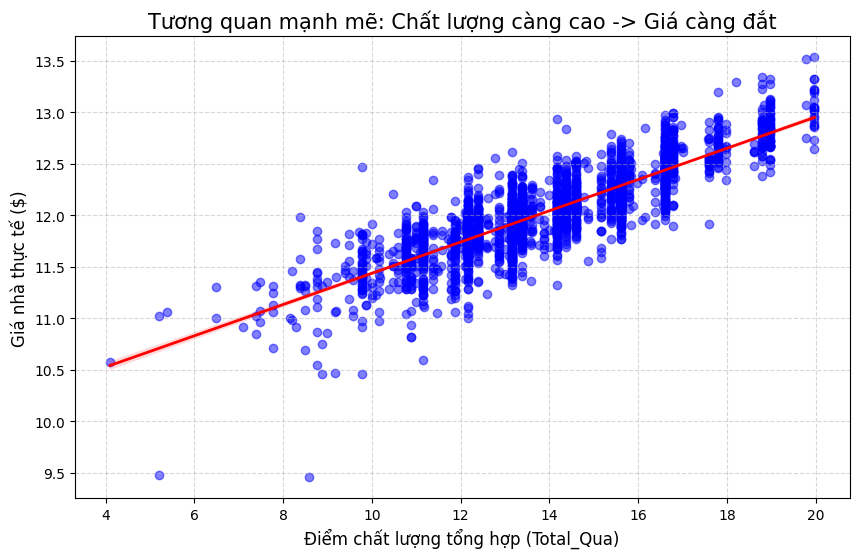

✅ Hệ số tương quan (Correlation): 0.8529
=> Biến này RẤT TỐT để đưa vào mô hình dự báo!


In [140]:
# --- VẼ BIỂU ĐỒ TƯƠNG QUAN (GIÁ NHÀ vs TỔNG CHẤT LƯỢNG) ---


plt.figure(figsize=(10, 6))

# Sử dụng regplot thay vì scatterplot đơn thuần để vẽ thêm đường hồi quy (trendline)
# scatter_kws={'alpha': 0.5}: Làm mờ các điểm để thấy rõ mật độ
# line_kws={'color': 'red'}: Vẽ đường xu hướng màu đỏ nổi bật
sns.regplot(data=data, x='Total_Qua', y='SalePrice', 
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Tương quan mạnh mẽ: Chất lượng càng cao -> Giá càng đắt', fontsize=15)
plt.xlabel('Điểm chất lượng tổng hợp (Total_Qua)', fontsize=12)
plt.ylabel('Giá nhà thực tế ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Tính nhanh hệ số tương quan để có con số cụ thể
corr = data['Total_Qua'].corr(data['SalePrice'])
print(f"✅ Hệ số tương quan (Correlation): {corr:.4f}")
if corr > 0.7:
    print("=> Biến này RẤT TỐT để đưa vào mô hình dự báo!")

# ⏳ BƯỚC 15: TÍNH TUỔI ĐỜI CỦA NGÔI NHÀ (AGE CALCULATION)

### 💡 Mục đích:
Con số "Năm 1990" hay "Năm 2000" chỉ là các mốc thời gian.
Cái mà người mua nhà thực sự quan tâm là: **"Căn nhà này đã bao nhiêu tuổi?"**.
Biến `Age` sẽ phản ánh trực tiếp độ khấu hao tài sản, giúp mô hình dự báo giá chính xác hơn.

### 🧮 Công thức: Age = (Năm bán)-(Năm xây dựng)

### ⚠️ Kiểm tra tính hợp lý (Sanity Check):
Sau khi tính toán, ta cần dùng lệnh `.describe()` để kiểm tra xem có giá trị nào bị **Âm (< 0)** không.
* Nếu `Age < 0`: Nghĩa là dữ liệu bị sai (Bán trước khi xây xong).Có không vậy nhỉ ??? chắc không,  Cần phải xử lý ngay. 

In [141]:
# --- TÍNH TUỔI ĐỜI CỦA NGÔI NHÀ ---
print("🚀 Đang tính toán tuổi đời (Age)...")

# 1. Tính tuổi
data['Age'] = data['Yr Sold'] - data['Year Built']

# 2. Kiểm tra nhanh xem có nhà nào bị lỗi "Tuổi âm" không (Vô lý)
# describe() sẽ cho biết min, max, mean...
age_stats = data['Age'].describe()
print(f"Thống kê độ tuổi:\n{age_stats}")

# Kiểm tra kỹ nếu có tuổi âm
negative_age = data[data['Age'] < 0]
if len(negative_age) > 0:
    print(f"⚠️ CẢNH BÁO: Phát hiện {len(negative_age)} căn nhà có tuổi âm (Dữ liệu lỗi).")
    print(negative_age[['Year Built', 'Yr Sold', 'Age']])
else:
    print("✅ Dữ liệu tuổi hợp lý (Không có tuổi âm).")

# 3. Xem mẫu 5 dòng đầu
print("\n🔍 5 dòng đầu của cột Age:")
print(data[['Year Built', 'Yr Sold', 'Age']].head())

🚀 Đang tính toán tuổi đời (Age)...
Thống kê độ tuổi:
count    2927.000000
mean       36.471814
std        30.283980
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64
✅ Dữ liệu tuổi hợp lý (Không có tuổi âm).

🔍 5 dòng đầu của cột Age:
   Year Built  Yr Sold  Age
0        1960     2010   50
1        1961     2010   49
2        1958     2010   52
3        1968     2010   42
4        1997     2010   13


# 📉 BƯỚC 16: PHÂN TÍCH TÁC ĐỘNG CỦA TUỔI ĐỜI (AGE ANALYSIS)

### 💡 Mục đích:
Kiểm tra mối quan hệ giữa **Tuổi thọ (`Age`)** và **Giá bán (`SalePrice`)**.
* **Giả thuyết:** Nhà càng mới (Tuổi thấp) $\rightarrow$ Giá càng cao. Nhà càng cũ (Tuổi cao) $\rightarrow$ Giá càng giảm do khấu hao tài sản.
* **Ngoại lệ:** Những căn nhà cổ (trên 100 tuổi) được bảo tồn tốt hoặc nằm ở khu lịch sử có thể đi ngược lại quy luật này.

### 🔍 Cách đọc biểu đồ:
* **Đường xu hướng đi xuống:** Chứng tỏ giả thuyết đúng (Càng già càng rẻ).
* **Các điểm phân tán:** Nếu các điểm nằm rải rác không theo quy luật, có thể yếu tố "Tuổi" không quan trọng bằng "Vị trí" hoặc "Chất lượng". Kệ ló đi

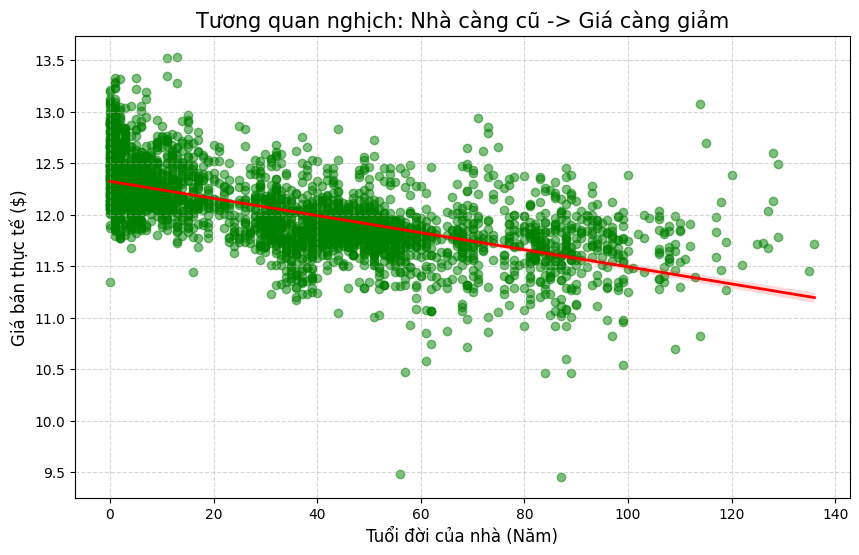

✅ Hệ số tương quan (Correlation): -0.6163
=> Đúng như dự đoán: Tương quan ÂM (Giá trị càng gần -1 thì mức độ giảm giá càng mạnh). Tau phục tau quá 😎😎😎😎


In [142]:
# --- VẼ BIỂU ĐỒ TƯƠNG QUAN (TUỔI ĐỜI vs GIÁ NHÀ) ---

plt.figure(figsize=(10, 6))

# Dùng regplot để vẽ thêm đường xu hướng
# line_kws={'color': 'red'}: Đường màu đỏ cho thấy xu hướng chung
sns.regplot(data=data, x='Age', y='SalePrice', 
            scatter_kws={'alpha': 0.5, 'color': 'green'}, 
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Tương quan nghịch: Nhà càng cũ -> Giá càng giảm', fontsize=15)
plt.xlabel('Tuổi đời của nhà (Năm)', fontsize=12)
plt.ylabel('Giá bán thực tế ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Tính hệ số tương quan
age_corr = data['Age'].corr(data['SalePrice'])
print(f"✅ Hệ số tương quan (Correlation): {age_corr:.4f}")

if age_corr < 0:
    print("=> Đúng như dự đoán: Tương quan ÂM (Giá trị càng gần -1 thì mức độ giảm giá càng mạnh). Tau phục tau quá 😎😎😎😎")
else:
    print("=> Bất ngờ: Tương quan DƯƠNG (Nhà càng cũ càng đắt?). Cần kiểm tra lại dữ liệu!")

In [143]:
# Xem lại thống kê mô tả của các biến số
data.describe()

MS SubClass  Lot Frontage     Lot Area  Overall Qual  Overall Cond  \
count  2927.000000   2927.000000  2927.000000   2927.000000   2927.000000   
mean      3.824333      4.204544     9.090645      6.090878      5.563717   
std       0.694027      0.328122     0.508508      1.406195      1.111960   
min       3.044522      3.091042     7.170888      1.000000      1.000000   
25%       3.044522      4.110874     8.914626      5.000000      5.000000   
50%       3.931826      4.262680     9.151757      6.000000      5.000000   
75%       4.262680      4.394449     9.352187      7.000000      6.000000   
max       5.252273      5.749393    12.279537     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area   Exter Qual   Exter Cond  \
count  2927.000000     2927.000000   2927.000000  2927.000000  2927.000000   
mean   1971.319098     1984.241886      2.068449     1.472659     1.403456   
std      30.238491       20.856725      2.616494     0.127288     0.088631   
min    1872.000000     1950.000000      0.000000     1.098612     0.693147   
25%    1954.000000     1965.000000      0.000000     1.386294     1.386294   
50%    1973.000000     1993.000000      0.000000     1.386294     1.386294   
75%    2000.500000     2004.000000      5.093750     1.609438     1.386294   
max    2010.000000     2010.000000      7.378384     1.791759     1.791759   

       ...      Mo Sold      Yr Sold    SalePrice      TotalSF   TotalFinSF  \
count  ...  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000   
mean   ...     6.215237  2007.790912    12.020918  2538.713017     7.529898   
std    ...     2.712368     1.317120     0.407783   767.575344     0.359992   
min    ...     1.000000  2006.000000     9.456419   334.000000     5.814131   
25%    ...     4.000000  2007.000000    11.771444  2000.000000     7.307873   
50%    ...     6.000000  2008.000000    11.982935  2448.000000     7.523481   
75%    ...     8.000000  2009.000000    12.271397  2988.500000     7.774015   
max    ...    12.000000  2010.000000    13.534474  6872.000000     8.790726   

           PorchSF    TotalBath          Age  Bsmt_Fin_Ratio    Total_Qua  
count  2927.000000  2927.000000  2927.000000     2927.000000  2927.000000  
mean      3.177733     2.215750    36.471814        0.784690    13.840674  
std       2.184419     0.804975    30.283980        0.154721     2.291625  
min       0.000000     1.000000     0.000000        0.474565     4.098612  
25%       0.000000     1.500000     7.000000        0.666667    12.158883  
50%       3.931826     2.000000    34.000000        0.814343    13.382027  
75%       4.916318     2.500000    54.000000        0.909429    15.605170  
max       7.096721     7.000000   136.000000        1.320312    19.969813  

[8 rows x 54 columns]

# 📂 BƯỚC 17: PHÂN TÁCH DỮ LIỆU (DATA SPLITTING BY TYPE) 
### Divide data into 2 dataset include: include object and exclude object
### 💡 Mục đích:
Dữ liệu của chúng ta là hỗn hợp giữa Số và Chữ.
Để xử lý hiệu quả, ta cần tách chúng thành 2 nhóm riêng biệt:
1.  **Nhóm Số (`data_num`):** Gồm các biến như Diện tích, Tuổi, Giá tiền... -> Sẽ dùng để tính toán thống kê, tìm tương quan.
2.  **Nhóm Chữ (`data_ob`):** Gồm các biến như Tên khu phố, Loại nhà... -> Sẽ dùng để One-Hot Encoding ở bước sau.

### 🛠️ Lệnh sử dụng: `select_dtypes`
* `include=['int64', 'float64']`: Lọc lấy tất cả các cột số nguyên và số thực.
* `include=['object']`: Lọc lấy tất cả các cột dạng văn bản (Text).

In [144]:
# --- PHÂN TÁCH DỮ LIỆU SỐ VÀ CHỮ ---
print("🚀 Đang chia dữ liệu thành 2 nhóm...")

# 1. Nhóm dữ liệu số (Numerical)
# Bao gồm số nguyên (int64) và số thực (float64)
data_num = data.select_dtypes(include=['int64', 'float64'])

# 2. Nhóm dữ liệu chữ (Object/Categorical)
data_ob = data.select_dtypes(include=['object'])

# 3. Kiểm tra kết quả
print(f"✅ Đã tách xong:")
print(f"   - Số lượng cột Số (Numeric): {data_num.shape[1]} cột")
print(f"   - Số lượng cột Chữ (Object):  {data_ob.shape[1]} cột")
print(f"   - Tổng cộng: {data_num.shape[1] + data_ob.shape[1]} cột (Khớp với dữ liệu gốc)")

# Xem thử 5 dòng đầu của mỗi nhóm
print("\n🔍 Ví dụ nhóm Số:")
print(data_num.head(3))
print("\n🔍 Ví dụ nhóm Chữ:")
print(data_ob.head(3))

🚀 Đang chia dữ liệu thành 2 nhóm...
✅ Đã tách xong:
   - Số lượng cột Số (Numeric): 54 cột
   - Số lượng cột Chữ (Object):  33 cột
   - Tổng cộng: 87 cột (Khớp với dữ liệu gốc)

🔍 Ví dụ nhóm Số:
   MS SubClass  Lot Frontage   Lot Area  Overall Qual  Overall Cond  \
0     3.044522      4.955827  10.366309             6             5   
1     3.044522      4.394449   9.360741             5             6   
2     3.044522      4.406719   9.565775             6             6   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0        1960            1960      4.727388    1.386294    1.386294  ...   
1        1961            1961      0.000000    1.386294    1.386294  ...   
2        1958            1958      4.691348    1.386294    1.386294  ...   

   Mo Sold  Yr Sold  SalePrice  TotalSF  TotalFinSF   PorchSF  TotalBath  Age  \
0        5     2010  12.278398   2736.0    7.738924  4.143135        2.0   50   
1        6     2010  11.561725   1778.0    7.319202  

In [145]:
# Lại xem lại thông tin bảng phát nữa
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   float64
 1   Lot Frontage     2927 non-null   float64
 2   Lot Area         2927 non-null   float64
 3   Overall Qual     2927 non-null   int64  
 4   Overall Cond     2927 non-null   int64  
 5   Year Built       2927 non-null   int64  
 6   Year Remod/Add   2927 non-null   int64  
 7   Mas Vnr Area     2927 non-null   float64
 8   Exter Qual       2927 non-null   float64
 9   Exter Cond       2927 non-null   float64
 10  Bsmt Qual        2927 non-null   float64
 11  Bsmt Cond        2927 non-null   float64
 12  BsmtFin SF 1     2927 non-null   float64
 13  BsmtFin SF 2     2927 non-null   float64
 14  Bsmt Unf SF      2927 non-null   float64
 15  Total Bsmt SF    2927 non-null   float64
 16  Heating QC       2927 non-null   int64  
 17  1st Flr SF       29

# 🔗 BƯỚC 18: MA TRẬN TƯƠNG QUAN (CORRELATION MATRIX)

### 💡 Mục đích:
Tính toán hệ số tương quan giữa tất cả các cặp biến số trong dữ liệu (`data_num`).
Kết quả là một bảng ma trận vuông đối xứng.

### 🔍 Chúng ta tìm kiếm điều gì?
1.  **Tương quan với Target:** Tìm những biến có quan hệ mạnh với `SalePrice` (để giữ lại).
2.  **Tương quan nội bộ (Đa cộng tuyến):** Tìm những cặp biến đầu vào có tương quan quá cao với nhau (r > 0.8).
    * *Ví dụ:* `GarageCars` (Số chỗ để xe) và `GarageArea` (Diện tích gara) thường đi đôi với nhau.
    * *Hành động:* Nếu thấy 2 biến giống hệt nhau, ta nên xem xét loại bỏ bớt 1 biến để mô hình nhẹ và chính xác hơn (Tránh hiện tượng Overfitting).

🚀 Đang tính toán ma trận tương quan cho dữ liệu số...
Bảng hệ số tương quan (Mẫu):
              MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond
MS SubClass      1.000000     -0.442320 -0.429790      0.075133     -0.045263
Lot Frontage    -0.442320      1.000000  0.710417      0.166059     -0.035097
Lot Area        -0.429790      0.710417  1.000000      0.137253     -0.032537
Overall Qual     0.075133      0.166059  0.137253      1.000000     -0.093755
Overall Cond    -0.045263     -0.035097 -0.032537     -0.093755      1.000000


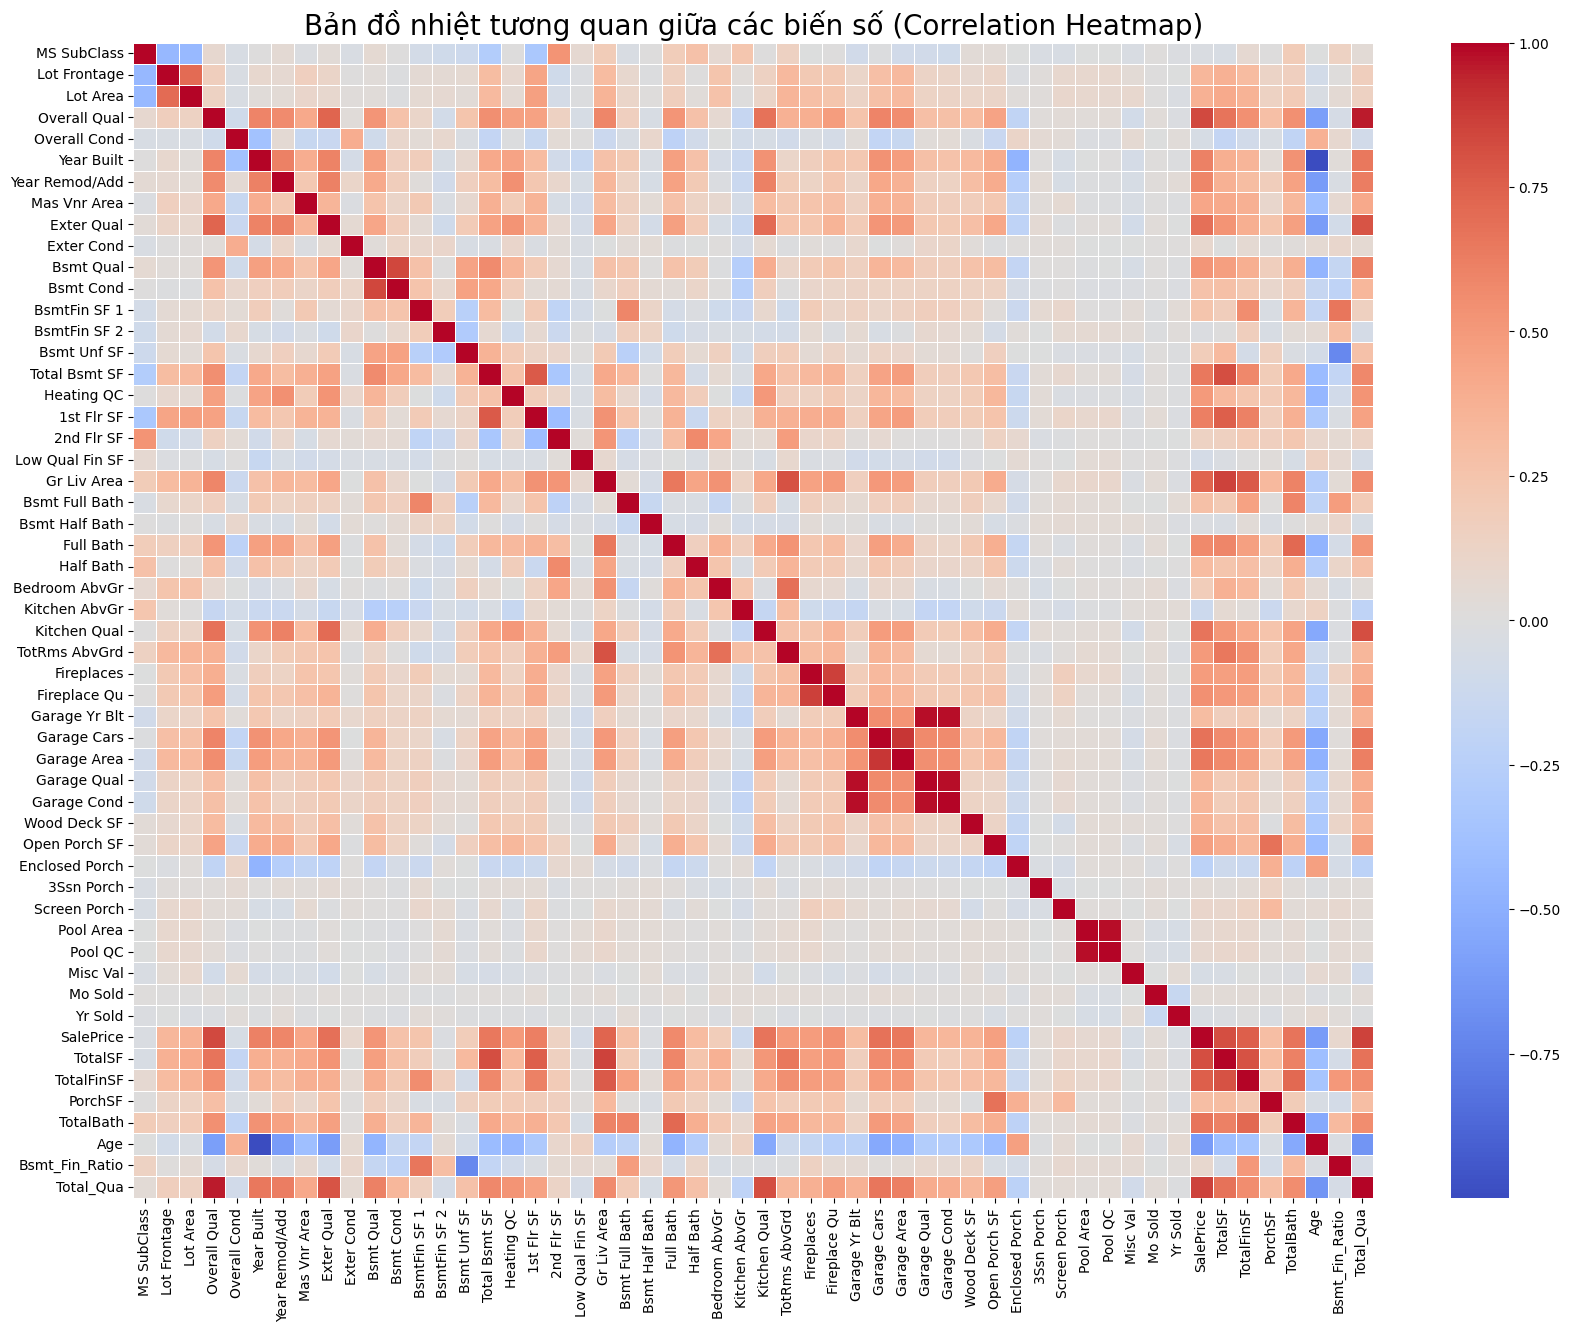

In [146]:
# --- TÍNH TOÁN MA TRẬN TƯƠNG QUAN ---

print("🚀 Đang tính toán ma trận tương quan cho dữ liệu số...")

# 1. Tính toán
corr_df = data_num.corr()

# 2. Hiển thị bảng số liệu (Ma trận)
# Chỉ in 5 dòng đầu và 5 cột đầu để xem mẫu (vì bảng quá lớn)
print("Bảng hệ số tương quan (Mẫu):")
print(corr_df.iloc[:5, :5])

# --- (MỞ RỘNG) TRỰC QUAN HÓA BẰNG HEATMAP ---
# Nhìn bảng số rất rối, biểu đồ nhiệt (Heatmap) sẽ giúp ta thấy ngay chỗ nào "nóng" (tương quan cao)
plt.figure(figsize=(20, 15)) # Kích thước lớn để chứa hết các biến

# Vẽ Heatmap
sns.heatmap(corr_df, 
            cmap='coolwarm', # Màu Xanh (Lạnh - Âm) -> Đỏ (Nóng - Dương)
            annot=False,     # Không hiện số (vì quá chi chít)
            fmt=".2f", 
            linewidths=0.5)

plt.title('Bản đồ nhiệt tương quan giữa các biến số (Correlation Heatmap)', fontsize=20)
plt.show()

#### Note:
- It's extremely difficult to realize pair of feature which have correlation with each other.
-> Next step: Fillter really important features that have strong correlation with SalePrice col.

In [147]:
# Top 20 yếu tố ảnh hưởng nhất
print(corre_fea.head(21))

SalePrice         1.000000
Overall Qual      0.799262
TotalSF           0.793127
TotalFinSF        0.731478
Gr Liv Area       0.706780
Exter Qual        0.697970
Kitchen Qual      0.672914
Garage Cars       0.647562
Garage Area       0.640138
TotalBath         0.636175
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Bsmt Qual         0.607532
Year Built        0.558426
Full Bath         0.545604
Fireplace Qu      0.533901
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Heating QC        0.450325
Name: SalePrice, dtype: float64


# 🔥 BƯỚC 19: TRỰC QUAN HÓA TOP 21 YẾU TỐ QUAN TRỌNG NHẤT

### 💡 Tại sao cần làm bước này?
Ma trận tương quan tổng thể quá lớn và rối rắm. Chúng ta cần "Zoom in" vào những yếu tố thực sự quan trọng.
Chiến lược là:
1.  **Lọc:** Chỉ lấy ra 21 biến có hệ số tương quan cao nhất với `SalePrice`.
2.  **Soi:** Vẽ Heatmap cho riêng nhóm này.

### 🔍 Chúng ta tìm kiếm điều gì trong Heatmap này?
* **Trục chính (Hàng SalePrice):** Màu càng đỏ đậm chứng tỏ biến đó càng quan trọng (Ví dụ: `Overall Qual`, `Gr Liv Area`).
* **Các ô khác:** Tìm những ô màu đỏ rực (tương quan > 0.8) nằm ngoài trục chính. Đó là dấu hiệu của **Đa cộng tuyến**.
    * *Ví dụ:* Nếu nhìn thấy `GarageCars` và `GarageArea` giao nhau là màu đỏ đậm $\rightarrow$ Hai biến này cung cấp thông tin trùng lặp $\rightarrow$ Cần cân nhắc loại bỏ bớt 1 biến.

🚀 Đang lọc và vẽ Heatmap cho Top 21 biến quan trọng nhất...
📋 Danh sách 21 biến được chọn:
['SalePrice', 'Total_Qua', 'Overall Qual', 'TotalSF', 'TotalFinSF', 'Gr Liv Area', 'Exter Qual', 'Garage Cars', 'Kitchen Qual', 'TotalBath', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplace Qu', 'Bsmt Qual', 'TotRms AbvGrd', 'Heating QC', 'Fireplaces']


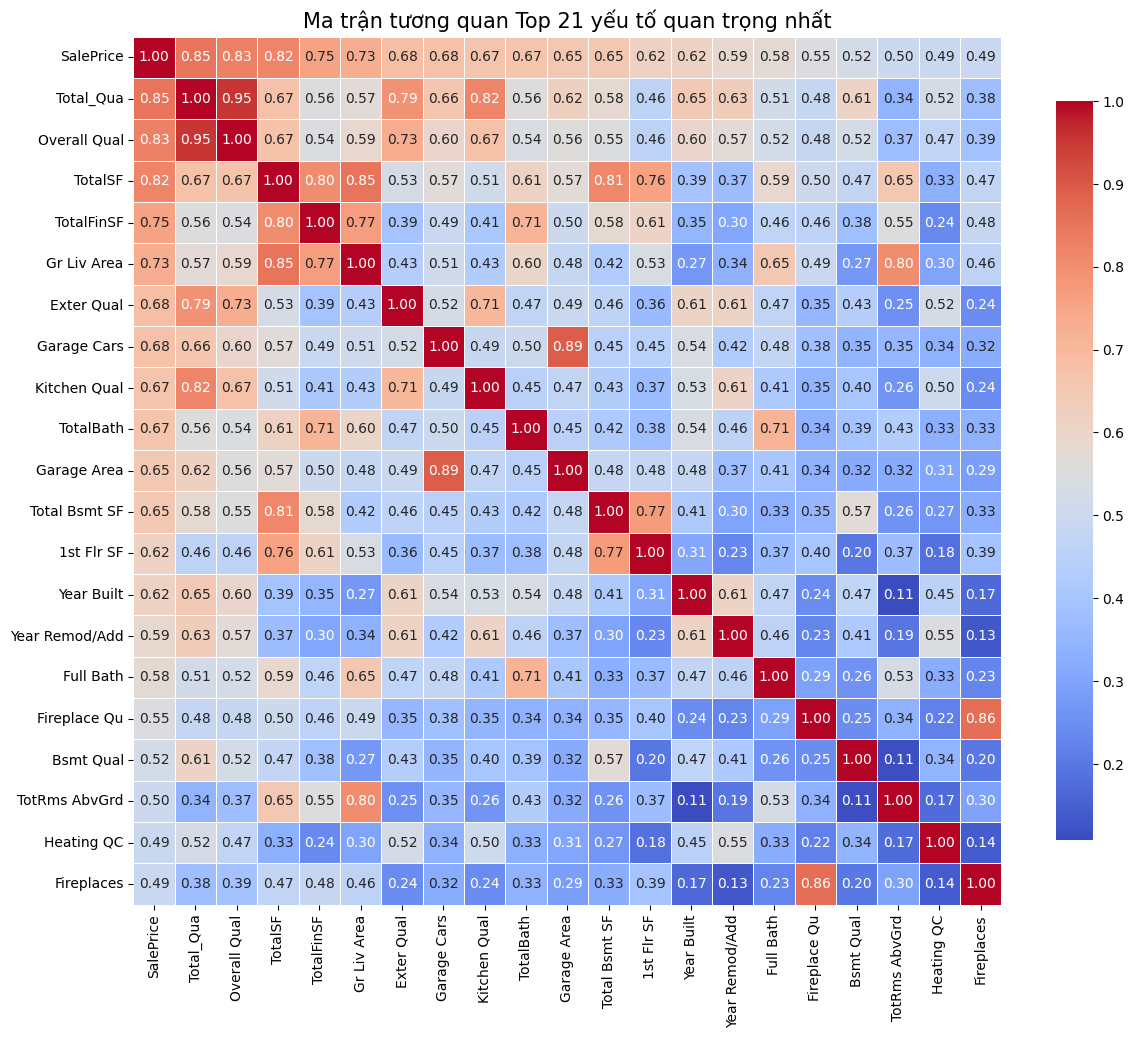

In [148]:
# --- TRỰC QUAN HÓA HEATMAP CHO TOP 21 FEATURE ---

print("🚀 Đang lọc và vẽ Heatmap cho Top 21 biến quan trọng nhất...")

# 1. TẠO DANH SÁCH 21 BIẾN QUAN TRỌNG NHẤT
# Tính ma trận tương quan (chỉ tính trên cột số)
corr_matrix = data.corr(numeric_only=True)

# Dùng hàm nlargest để lấy ra 21 cột có tương quan cao nhất với SalePrice
# .index sẽ lấy ra danh sách tên cột
top_fea = corr_matrix.nlargest(21, 'SalePrice')['SalePrice'].index

print("📋 Danh sách 21 biến được chọn:")
print(list(top_fea))


# 2. VẼ HEATMAP
plt.figure(figsize=(14, 12)) # Kích thước vừa đủ để nhìn rõ số

# Vẽ Heatmap chỉ trên tập dữ liệu con (subset) gồm 21 cột này
sns.heatmap(data[top_fea].corr(), 
            annot=True,     # Hiện con số cụ thể
            fmt=".2f",      # Làm tròn 2 số thập phân cho gọn
            cmap='coolwarm',# Màu Xanh (Lạnh/Âm) - Đỏ (Nóng/Dương)
            square=True,    # Ép các ô thành hình vuông cho đẹp
            linewidths=0.5, # Đường kẻ trắng giữa các ô
            cbar_kws={"shrink": .8}) # Thu nhỏ thanh chú thích màu bên cạnh

plt.title('Ma trận tương quan Top 21 yếu tố quan trọng nhất', fontsize=15)
plt.show()

### Các cặp đặc điểm có mối tương quan mạnh mẽ với nhau:
+ Overall Qual : Total_Qua (Tổng chất lượng)
+ Total Bsmt SF : Bsmt_Fin_SF (Tổng diện tích tầng hầm)
+ BsmtFin SF 1 : Bsmt_Fin_SF (Diện tích tầng hầm đã hoàn thiện)
+ Bsmt_Fin_Ratio : Bsmt_Fin_SF (Tỷ lệ hoàn thiện tầng hầm)
+ r Liv Area : TotalSF (Diện tích sinh hoạt trên mặt đất)
+ TotalFinSF : TotalSF (Tổng diện tích sàn đã hoàn thiện)

Hầu hết các đặc điểm dường như có liên quan lẫn nhau. Điều đó có nghĩa là hầu hết các yếu tố của ngôi nhà đã được xem xét trước khi bắt đầu xây dựng, vì vậy nếu bất kỳ yếu tố nào tăng lên, nó sẽ khiến các yếu tố khác tăng lên và ngược lại.

# 🧩 BƯỚC 20 : PHỤ TRỢ : KHÁM PHÁ QUAN HỆ ĐA CHIỀU (PAIRPLOT)

### 💡 Mục đích:
Chúng ta muốn nhìn thấy bức tranh tổng thể về mối quan hệ giữa các biến quan trọng nhất.
* **Câu hỏi:** Liệu `Gr Liv Area` (Diện tích ở) và `Total Bsmt SF` (Diện tích hầm) có quan hệ gì không? Chúng tác động thế nào đến `SalePrice`?

### 🛠️ Kỹ thuật:
Sử dụng `sns.pairplot` cho **Top 6 biến** có tương quan cao nhất.
* **Tại sao chỉ 6?**  6 thôi chứ nhiều quá nhìn đau mắt lắm man!!!
* **Cách đọc:**
    * **Đường chéo:** Cho biết phân phối của dữ liệu (Hình quả chuông là tốt).
    * **Các ô khác:** Cho biết xu hướng tương quan (Đường chéo lên là thuận, xuống là nghịch).

🚀 Đang vẽ Pairplot (Sẽ mất vài giây để xử lý)...


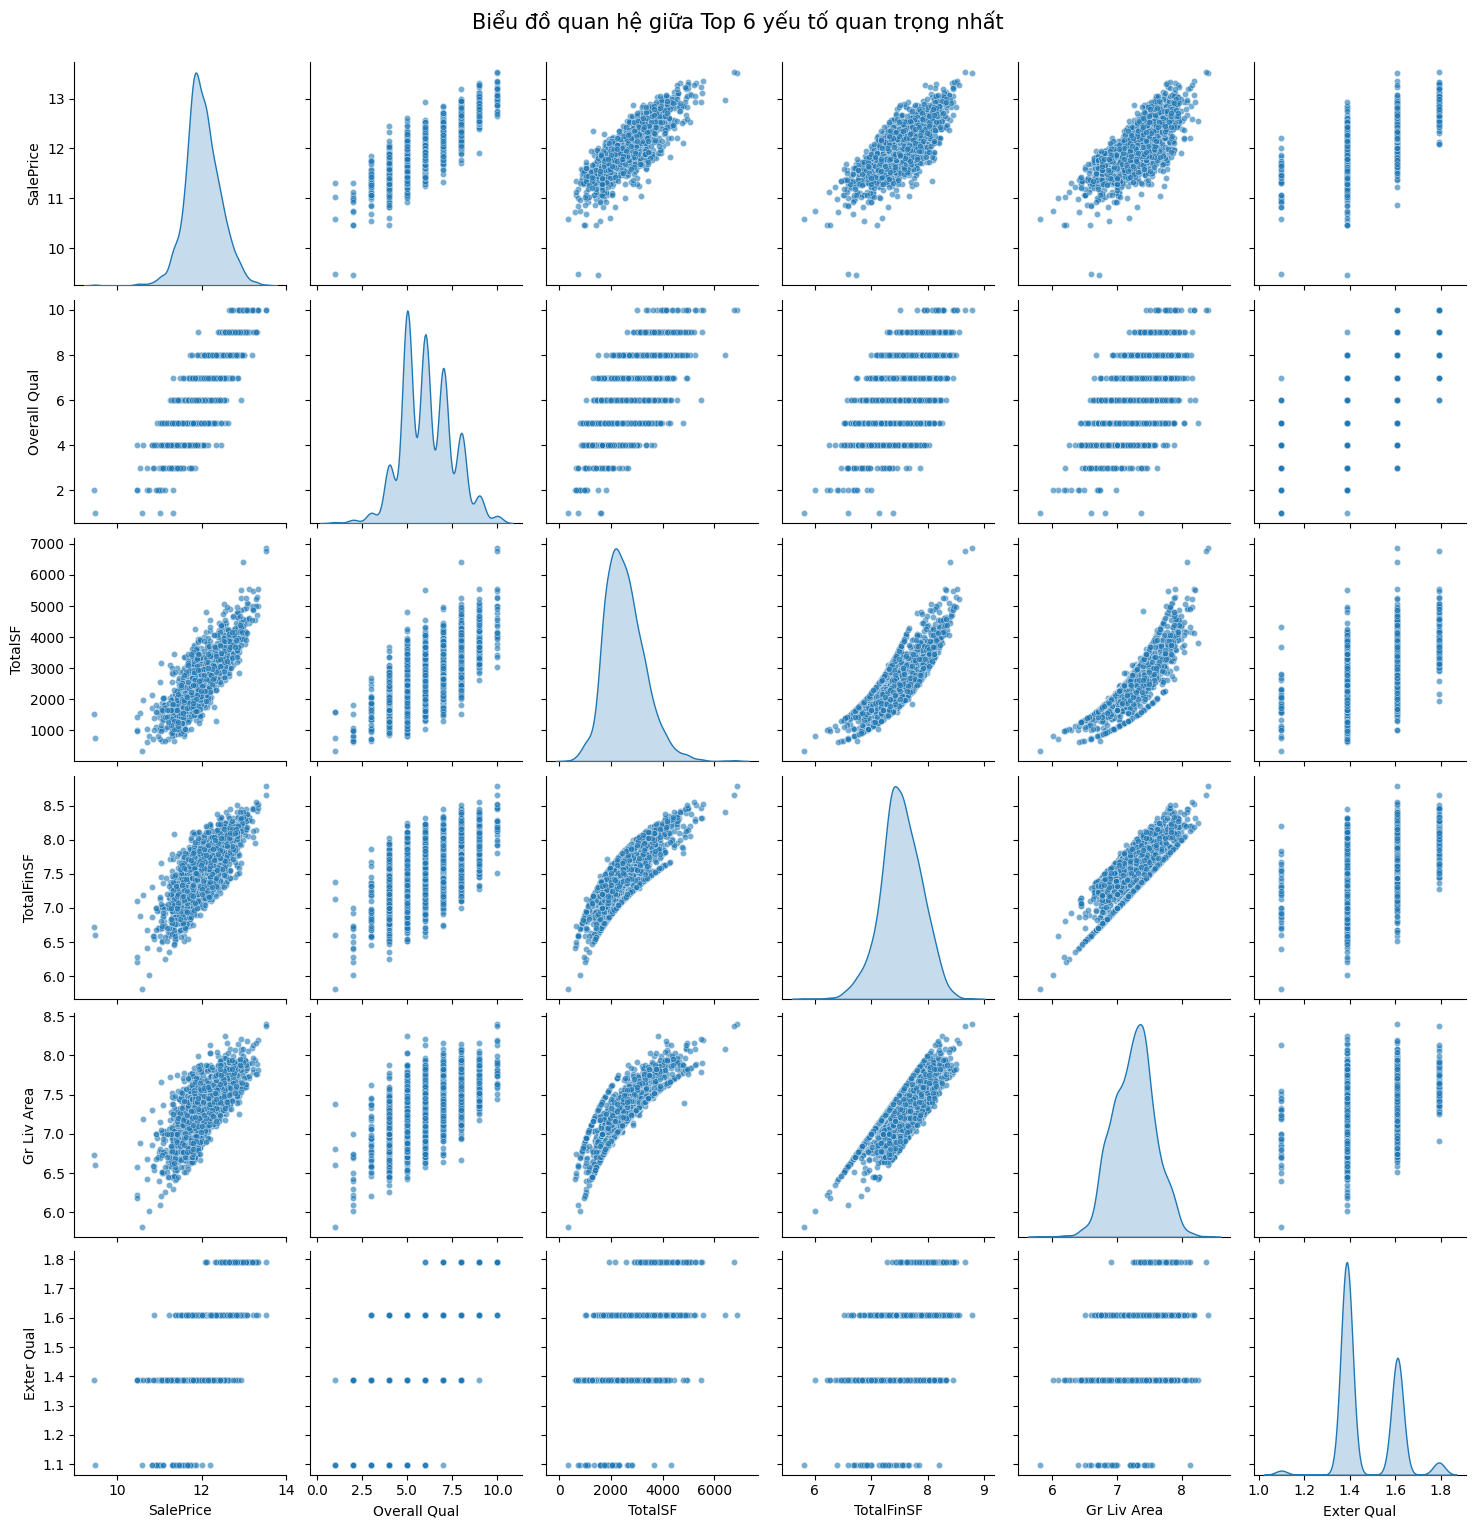

In [149]:
print("🚀 Đang vẽ Pairplot (Sẽ mất vài giây để xử lý)...")

# 1. Lấy danh sách 6 biến quan trọng nhất (Top 6 Correlation)
# Lưu ý: corre_fea là Series chứa hệ số tương quan đã tính ở bước trước
top_6_vars = corre_fea.index[0:6] 

# 2. Vẽ Pairplot
# diag_kind='kde': Đường chéo sẽ vẽ đường cong mật độ (mượt hơn histogram)
# plot_kws={'alpha': 0.6}: Làm mờ điểm ảnh để nhìn rõ mật độ
sns.pairplot(data[top_6_vars], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 20})

plt.suptitle('Biểu đồ quan hệ giữa Top 6 yếu tố quan trọng nhất', y=1.02, fontsize=15)
plt.show()

# 📊 BƯỚC 21: KIỂM TRA LẠI PHÂN PHỐI BIẾN MỤC TIÊU (FINAL CHECK)

### 💡 Mục đích:
Trước khi đưa vào mô hình, ta cần chắc chắn rằng biến mục tiêu `SalePrice` trong tập dữ liệu số (`data_num`) đã là phiên bản **được chuẩn hóa (Log Transformed)**.
Nếu biểu đồ vẫn bị lệch phải $\rightarrow$ Có lỗi trong quá trình tách dữ liệu.
Nếu biểu đồ hình chuông $\rightarrow$ Mọi thứ đã sẵn sàng.

### 📉 Cách đọc:
* **Trục hoành:** Giá trị Log của giá nhà (thường nằm trong khoảng 10 đến 14). log=12 thì nhà khoamgr 162000 đô
* **Hình dạng:** Kỳ vọng phân phối chuẩn (Normal Distribution).

### RUN CODE NÀY 1 LẦN THÔI NHÉ. NHỠ RUN 2 LẦN NÓ KO ĐÚNG ĐÂU. KO ĐÚNG THÌ CHẠY LẠI DỮ LIỆU NHEEEEEEEEEEEEE

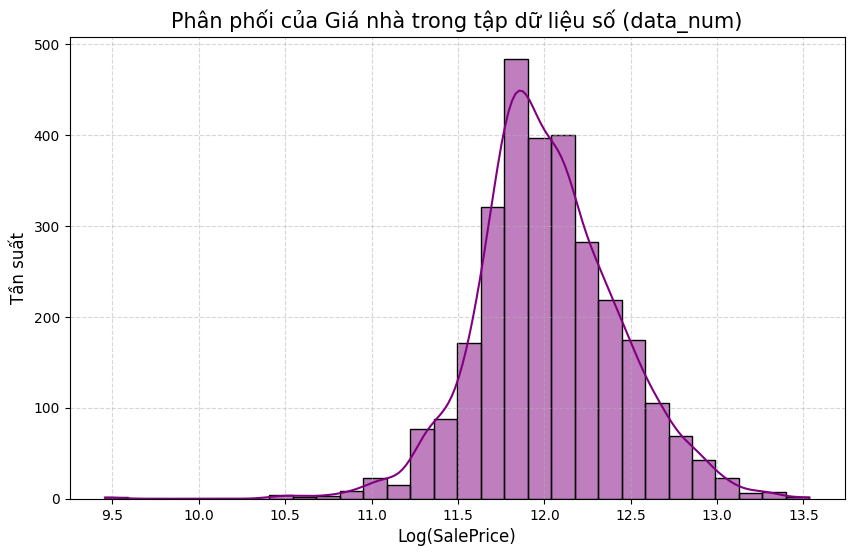

✅ Độ lệch (Skewness) hiện tại: -0.01


In [150]:
# --- KIỂM TRA LẠI PHÂN PHỐI TRONG TẬP DATA_NUM ---


plt.figure(figsize=(10, 6))

# Vẽ Histogram kèm đường KDE
sns.histplot(data=data_num, x='SalePrice', kde=True, color='purple', bins=30)

plt.title('Phân phối của Giá nhà trong tập dữ liệu số (data_num)', fontsize=15)
plt.xlabel('Log(SalePrice)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# In ra giá trị độ lệch để chắc chắn
print(f"✅ Độ lệch (Skewness) hiện tại: {data_num['SalePrice'].skew():.2f}")

# DỰ ĐOÁN SỬ DỤNG  DECISION TREE VÀ RANDOM FOREST


# ✂️ BƯỚC 22: CHIA TẬP HUẤN LUYỆN & KIỂM TRA (TRAIN-TEST SPLIT)

### 💡 Mục đích:
Trước khi dạy mô hình, chúng ta cần chia dữ liệu thành 2 phần tách biệt:
1.  **Tập Train (Huấn luyện - 80%):** Dùng làm "Sách giáo khoa" cho mô hình học. Nó bao gồm cả đề bài (`X_train`) và đáp án (`y_train`).
2.  **Tập Test (Kiểm tra - 20%):** Dùng làm "Đề thi". Chúng ta giấu đi đáp án (`y_test`) và chỉ đưa đề bài (`X_test`) cho mô hình dự đoán, sau đó so sánh kết quả.

### 🛠️ Giải thích tham số:
* **`test_size = 0.2`**: Cắt 20% dữ liệu để dành cho việc thi (Test).
* **`random_state = 42`**: Đây là "hạt giống ngẫu nhiên". Nó đảm bảo rằng lần nào chia dữ liệu thì kết quả cũng giống hệt nhau (nếu không có số này, mỗi lần chạy máy sẽ bốc ngẫu nhiên khác nhau, làm kết quả không đồng nhất).


### NOTE:
code cũ: 
x = data_num.drop(columns = ['SalePrice'])
y = data_num['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
Mô hình sẽ bỏ qua hoàn toàn các thông tin dạng chữ mà chúng ta đã xử lý (như Neighborhood - Khu phố, MS Zoning - Quy hoạch...).
Ví dụ: Nhà ở khu phố "nhà giàu" (NoRidge) thường đắt hơn, nhưng nếu dùng data_num, máy tính sẽ không biết nhà đó ở đâu.
Nên thay data_num bằng final_data

In [151]:
from sklearn.model_selection import train_test_split

print("🚀 Đang phân chia dữ liệu Train/Test...")

# 1. Tách Biến đầu vào (Features) và Biến mục tiêu (Target)
# X: Tất cả các cột trừ SalePrice (Đề bài)
# y: Chỉ cột SalePrice (Đáp án)
X = final_data.drop(columns=['SalePrice']) 
y = final_data['SalePrice']

# 2. Chia tập huấn luyện (Train) và tập kiểm tra (Test)
# Test size = 0.2 (20% để thi, 80% để học)
# Random state = 42 (Để kết quả ổn định)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Kiểm tra kết quả
print(f"✅ Đã chia xong!")
print(f"   - Kích thước tập Train: {X_train.shape} (Dòng, Cột)")
print(f"   - Kích thước tập Test:  {X_test.shape} (Dòng, Cột)")

# Xem thử dữ liệu X_train
X_train

🚀 Đang phân chia dữ liệu Train/Test...
✅ Đã chia xong!
   - Kích thước tập Train: (2341, 245) (Dòng, Cột)
   - Kích thước tập Test:  (586, 245) (Dòng, Cột)


MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
2262     3.044522      4.499810  9.304923             8             5   
1678     5.081404      3.218876  7.609367             5             5   
2778     4.110874      4.564348  9.506809             7             5   
2506     5.081404      3.433987  8.064951             7             5   
1088     4.110874      3.951244  8.990940             6             5   
...           ...           ...       ...           ...           ...   
1639     4.795791      4.127134  8.991687             9             5   
1095     4.110874      4.174387  8.955577             7             5   
1130     4.110874      4.174387  9.081597             6             5   
1294     3.931826      4.406719  8.896862             5             5   
860      4.454347      4.110874  8.881975             5             8   

      Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
2262        2007            2007      4.394449    1.609438    1.386294  ...   
1678        1970            1970      5.720312    1.386294    1.386294  ...   
2778        2002            2002      0.000000    1.609438    1.386294  ...   
2506        2005            2005      0.000000    1.386294    1.386294  ...   
1088        2005            2005      0.000000    1.386294    1.386294  ...   
...          ...             ...           ...         ...         ...  ...   
1639        2006            2006      5.111988    1.609438    1.386294  ...   
1095        2002            2002      0.000000    1.609438    1.386294  ...   
1130        2003            2003      0.000000    1.609438    1.386294  ...   
1294        1920            1950      0.000000    1.098612    1.098612  ...   
860         1972            2003      0.000000    1.386294    1.609438  ...   

      Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
2262            False           True          False          False   
1678            False          False          False          False   
2778            False          False          False          False   
2506            False          False          False          False   
1088            False          False          False          False   
...               ...            ...            ...            ...   
1639            False          False          False          False   
1095            False          False          False          False   
1130            False          False          False          False   
1294            False          False          False          False   
860             False          False          False          False   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
2262          False                   False                  False   
1678           True                   False                  False   
2778           True                   False                  False   
2506           True                   False                  False   
1088           True                   False                  False   
...             ...                     ...                    ...   
1639           True                   False                  False   
1095           True                   False                  False   
1130           True                   False                  False   
1294           True                   False                  False   
860            True                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
2262                  False                  False                    True  
1678                  False                   True                   False  
2778                  False                   True                   False  
2506                  False                   True                   False  
1088                  False                   True                   False  
...                     ...         

### Build model DecisionTreeRegressor -> find important Features

# 🌲 BƯỚC 23: HUẤN LUYỆN MÔ HÌNH (DECISION TREE)

### 💡 Mô hình: Decision Tree Regressor
Thay vì tìm một công thức toán học, mô hình này xây dựng một "Cây câu hỏi" (Flowchart).
* **Cơ chế:** Nó chia dữ liệu thành các nhóm nhỏ dựa trên các quy tắc Yes/No (Ví dụ: `TotalSF > 2000`?).
* **Ưu điểm:** Bắt được các quy luật phi tuyến tính (Non-linear) phức tạp mà Linear Regression bỏ sót. Không cần Scale dữ liệu.

### ⚙️ Tham số quan trọng: `max_depth=10`
Đây là "cái phanh" để ngăn mô hình học vẹt.
* Nếu không giới hạn độ sâu, cây sẽ cố nhớ từng căn nhà một $\rightarrow$ **Overfitting** (Học vẹt, điểm Train cao nhưng đi thi Test thấp).
* Giới hạn `max_depth=10` giúp mô hình chỉ học những quy luật chung nhất.

In [152]:
# 1. Khởi tạo mô hình
# max_depth=10: Giới hạn cây chỉ sâu 10 tầng (để tránh học vẹt/overfitting)
# random_state=42: Để kết quả ổn định
model = DecisionTreeRegressor(max_depth=10, random_state=42)

# 2. Huấn luyện (Học bài)
print("Đang huấn luyện mô hình...")
model.fit(X_train, y_train)
print("Đã học xong!")

Đang huấn luyện mô hình...
Đã học xong!


# 📝 BƯỚC 24: ĐÁNH GIÁ MÔ HÌNH (MODEL EVALUATION)

### 💡 Các chỉ số đánh giá:
1.  **R2 Score (Hệ số xác định):**
    * Cho biết mô hình giải thích được bao nhiêu % sự biến động của giá nhà.
    * *Thang đo:* 0 đến 1. (Ví dụ: 0.85 nghĩa là mô hình hiểu được 85% quy luật).
2.  **RMSE (Root Mean Squared Error):**
    * Độ lệch chuẩn của sai số dự báo.
    * Giá trị càng nhỏ càng tốt.
    * *Lưu ý:* Vì ta đang dự báo trên dữ liệu Log, nên đây là sai số Log.

### 📉 Trực quan hóa:
Vẽ biểu đồ so sánh giữa **Giá thực tế (Actual)** và **Giá dự báo (Predicted)**.
* Nếu các điểm nằm trên một đường chéo thẳng tắp $\rightarrow$ Dự báo chuẩn 100%.
* Nếu các điểm phân tán lung tung $\rightarrow$ Mô hình kém.

🚀 Đang chấm điểm mô hình...
📊 KẾT QUẢ ĐÁNH GIÁ (TRÊN LOG SCALE):
   - R2 Score (Độ chính xác): 0.8173
   - RMSE (Sai số log): 0.1812

💰 SAI SỐ THỰC TẾ (USD):
   - Trung bình mô hình đoán sai khoảng: $21,674


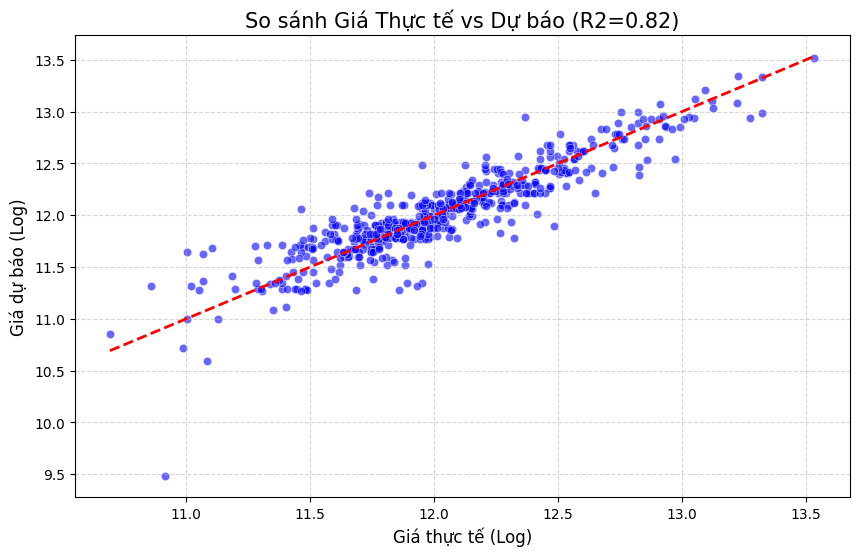

In [153]:
# --- ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("🚀 Đang chấm điểm mô hình...")

# 1. Dự đoán thử trên đề thi (Tập Test)
y_pred = model.predict(X_test)

# 2. Tính toán các chỉ số sai số (Trên đơn vị Log)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 KẾT QUẢ ĐÁNH GIÁ (TRÊN LOG SCALE):")
print(f"   - R2 Score (Độ chính xác): {r2:.4f}")
print(f"   - RMSE (Sai số log): {rmse:.4f}")

# --- (MỞ RỘNG) ĐỔI RA USD ĐỂ DỄ HÌNH DUNG ---
# Dùng hàm np.expm1 để đảo ngược hàm log1p lúc trước
y_test_usd = np.expm1(y_test)
y_pred_usd = np.expm1(y_pred)

mae_usd = mean_absolute_error(y_test_usd, y_pred_usd)
print(f"\n💰 SAI SỐ THỰC TẾ (USD):")
print(f"   - Trung bình mô hình đoán sai khoảng: ${mae_usd:,.0f}")

# --- TRỰC QUAN HÓA: THỰC TẾ vs DỰ BÁO ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
# Vẽ đường chéo đỏ (Đường lý tưởng)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.title(f'So sánh Giá Thực tế vs Dự báo (R2={r2:.2f})', fontsize=15)
plt.xlabel('Giá thực tế (Log)', fontsize=12)
plt.ylabel('Giá dự báo (Log)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 🌲🌲 BƯỚC 26: NÂNG CẤP MÔ HÌNH (RANDOM FOREST)

### 💡 Tại sao dùng Random Forest?
Mô hình cây đơn (Decision Tree) trước đó có thể bị **Overfitting** (Học vẹt, điểm Train cao nhưng Test thấp).
Chúng ta sẽ thực hiện một quy trình khép kín để thay thế mô hình Cây đơn (Decision Tree) bằng **Rừng ngẫu nhiên (Random Forest)**.
Mục tiêu là giảm thiểu hiện tượng học vẹt (Overfitting) và tăng độ ổn định.

### 🛠️ Giải thích quy trình:
1.  **Trồng rừng (Training):**
    * `n_estimators=300`: Tạo ra 300 "chuyên gia" (cây) để cùng tham gia dự đoán.
    * `max_features='sqrt'`: Mỗi cây chỉ được xem xét một nhóm nhỏ các đặc trưng ngẫu nhiên. Điều này buộc các cây phải tư duy độc lập.
    * `n_jobs=-1`: Sử dụng **tất cả** sức mạnh CPU máy tính để xử lý song song cho nhanh.

2.  **Đổi đơn vị (Inverse Log):**
    * Máy học trên số Logarit (ví dụ: 12.5).
    * Con người cần số tiền thật (ví dụ: $200,000).
    * $\rightarrow$ Dùng hàm `np.expm1` để chuyển đổi kết quả dự báo về lại USD.

### 📉 Kỳ vọng kết quả:
* **R2 Score:** Hy vọng đạt trên **0.87**.
* **Biểu đồ:** Các điểm màu xanh phải bám sát **đường kẻ đỏ** (đường lý tưởng). Nếu các điểm xanh phân tán quá xa đường đỏ, mô hình vẫn còn sai số lớn.

🌱 Đang gieo hạt trồng 300 cây (Sẽ mất chút thời gian)...
🌳 Khu rừng đã trưởng thành! Đang tiến hành kiểm tra...

📊 KẾT QUẢ ĐÁNH GIÁ RANDOM FOREST
1. Độ chính xác (R2 Score):   0.9267 (Càng gần 1 càng tốt)
2. Sai số kỹ thuật (RMSE):    0.1148
----------------------------------------
💰 SAI SỐ THỰC TẾ (Trung bình): $15,147 / căn nhà
🚀 TUYỆT VỜI! Mô hình hoạt động cực kỳ hiệu quả.


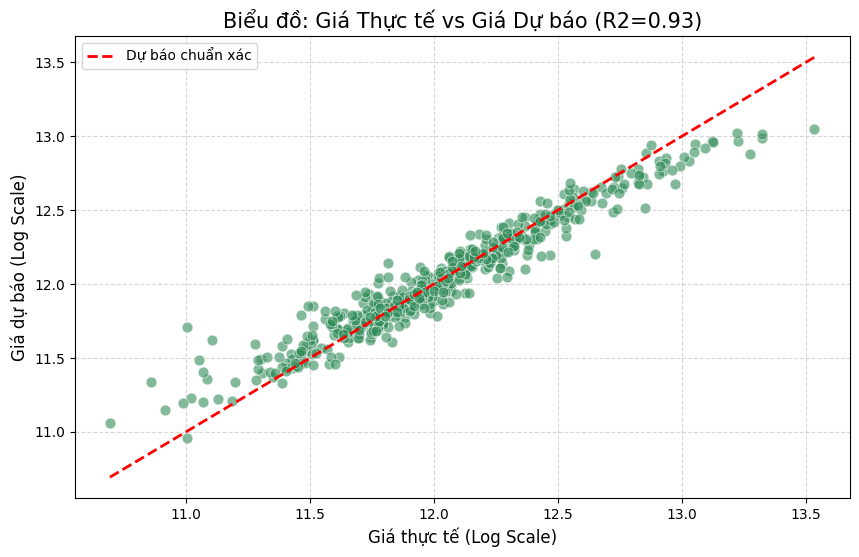

In [154]:
# --- QUY TRÌNH TOÀN DIỆN: HUẤN LUYỆN & ĐÁNH GIÁ RANDOM FOREST ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================================
# 1. HUẤN LUYỆN MÔ HÌNH (TRAINING)
# =========================================
print("🌱 Đang gieo hạt trồng 300 cây (Sẽ mất chút thời gian)...")

rf = RandomForestRegressor(
    n_estimators=300,       # Số lượng cây
    max_depth=15,           # Độ sâu tối đa của mỗi cây
    min_samples_split=5,    # Số mẫu tối thiểu để tách nhánh
    min_samples_leaf=2,     # Số mẫu tối thiểu ở lá
    max_features='sqrt',    # Số lượng đặc trưng được xem xét khi tách
    random_state=42,        # Cố định kết quả
    n_jobs=-1               # Chạy song song đa luồng
)

rf.fit(X_train, y_train)
print("🌳 Khu rừng đã trưởng thành! Đang tiến hành kiểm tra...")

# =========================================
# 2. DỰ BÁO VÀ TÍNH TOÁN SAI SỐ
# =========================================
# Dự báo trên tập Test
y_pred_rf = rf.predict(X_test)

# --- Tính chỉ số trên thang Log (Dùng để đánh giá kỹ thuật) ---
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# --- Tính chỉ số trên thang USD thực tế (Dùng để báo cáo) ---
y_test_usd = np.expm1(y_test)       # Đảo ngược log
y_pred_usd = np.expm1(y_pred_rf)    # Đảo ngược log
mae_usd = mean_absolute_error(y_test_usd, y_pred_usd)

# =========================================
# 3. HIỂN THỊ KẾT QUẢ
# =========================================
print("\n" + "="*40)
print(f"📊 KẾT QUẢ ĐÁNH GIÁ RANDOM FOREST")
print("="*40)
print(f"1. Độ chính xác (R2 Score):   {r2_rf:.4f} (Càng gần 1 càng tốt)")
print(f"2. Sai số kỹ thuật (RMSE):    {rmse_rf:.4f}")
print("-" * 40)
print(f"💰 SAI SỐ THỰC TẾ (Trung bình): ${mae_usd:,.0f} / căn nhà")
print("="*40)

# Đưa ra nhận xét tự động
if r2_rf > 0.88:
    print("🚀 TUYỆT VỜI! Mô hình hoạt động cực kỳ hiệu quả.")
elif r2_rf > 0.85:
    print("✅ TỐT! Mô hình hoạt động ổn định.")
else:
    print("⚠️ CẦN CẢI THIỆN. Hãy thử tinh chỉnh tham số (Hyperparams).")

# =========================================
# 4. TRỰC QUAN HÓA (VẼ BIỂU ĐỒ)
# =========================================
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='seagreen', s=60)

# Vẽ đường chéo đỏ (Đường lý tưởng 100% chính xác)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Dự báo chuẩn xác')

plt.title(f'Biểu đồ: Giá Thực tế vs Giá Dự báo (R2={r2_rf:.2f})', fontsize=15)
plt.xlabel('Giá thực tế (Log Scale)', fontsize=12)
plt.ylabel('Giá dự báo (Log Scale)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# LINEAR REGRESSION

# 🏆 BƯỚC L1: XẾP HẠNG CÁC YẾU TỐ QUAN TRỌNG NHẤT (FEATURE IMPORTANCE)

### 💡 Mục đích:
Chúng ta muốn trả lời câu hỏi: **"Điều gì thực sự khiến một ngôi nhà tăng giá?"**.
Là Diện tích? Số phòng ngủ? Hay Chất lượng hoàn thiện?

### 🔍 Cách đọc kết quả:
* **Score:** Tổng điểm của tất cả các biến cộng lại bằng 1.
* **Top Features:** Những biến nằm đầu bảng chính là những "chìa khóa vàng" quyết định giá nhà.
* **Biểu đồ:** Giúp ta thấy rõ sự chênh lệch. Thường thì `Overall Qual` (Chất lượng tổng thể) và `Gr Liv Area` (Diện tích ở) sẽ áp đảo các yếu tố khác.

📋 TOP 20 YẾU TỐ QUYỀN LỰC NHẤT:
              Feature  Importance_level
46            TotalSF          0.085173
3        Overall Qual          0.078424
20        Gr Liv Area          0.056477
47         TotalFinSF          0.052897
5          Year Built          0.043927
49          TotalBath          0.043394
50                Age          0.035987
27       Kitchen Qual          0.034735
33        Garage Area          0.033039
31      Garage Yr Blt          0.029680
10          Bsmt Qual          0.029636
17         1st Flr SF          0.029551
32        Garage Cars          0.029277
15      Total Bsmt SF          0.028812
8          Exter Qual          0.026513
6      Year Remod/Add          0.023817
23          Full Bath          0.022903
29         Fireplaces          0.019555
30       Fireplace Qu          0.017164
175  Foundation_PConc          0.015427


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7688\1064546954.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


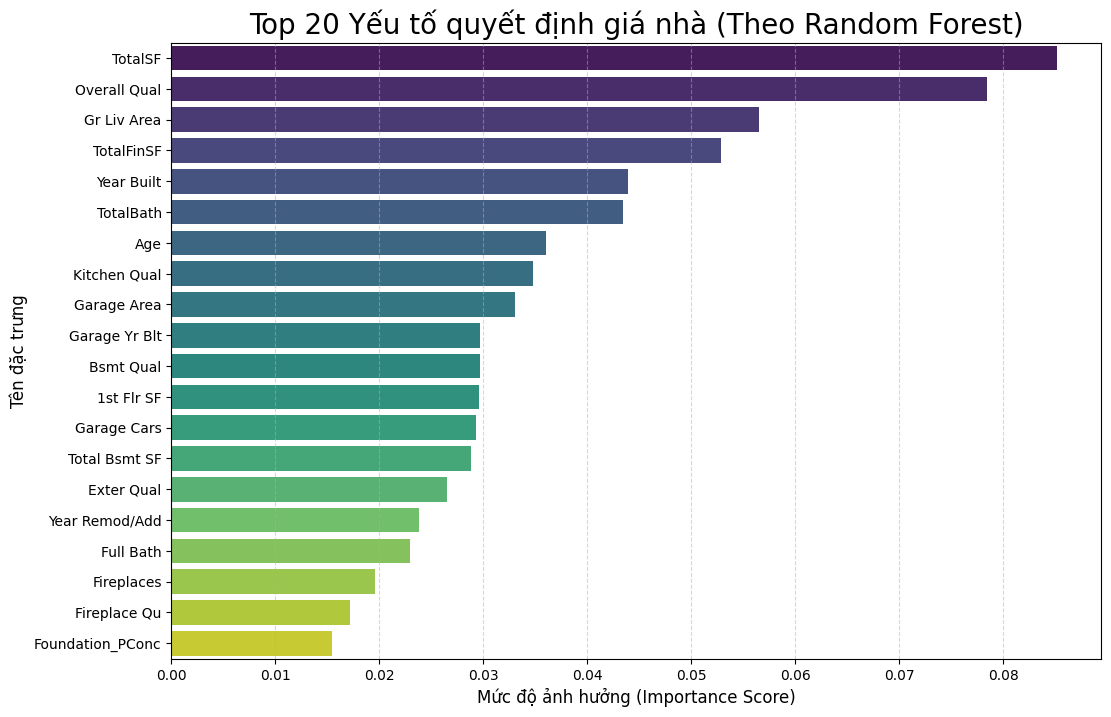

In [155]:
# 1. Lấy độ quan trọng từ mô hình
imp_fea = rf.feature_importances_

# 2. Tạo bảng dữ liệu và sắp xếp giảm dần
df_fea_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_level': imp_fea
}).sort_values(by='Importance_level', ascending=False)

# 3. In ra danh sách Top 20 dưới dạng bảng số
print("📋 TOP 20 YẾU TỐ QUYỀN LỰC NHẤT:")
print(df_fea_imp.head(20))

# 4. TRỰC QUAN HÓA: Vẽ biểu đồ Top 20 yếu tố
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_fea_imp.head(20), 
    x='Importance_level', 
    y='Feature', 
    palette='viridis' # Màu sắc hiện đại
)

plt.title('Top 20 Yếu tố quyết định giá nhà (Theo Random Forest)', fontsize=20)
plt.xlabel('Mức độ ảnh hưởng (Importance Score)', fontsize=12)
plt.ylabel('Tên đặc trưng', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# 🧹 BƯỚC L2: SÀNG LỌC CÁC BIẾN CỐT LÕI (FEATURE SELECTION)

### 💡 Mục đích:
Mô hình hiện tại đang sử dụng hàng trăm biến đầu vào (do quá trình One-Hot Encoding tạo ra nhiều cột nhỏ).
Tuy nhiên, phần lớn trong số đó đóng góp rất ít vào việc dự báo giá nhà (Importance $\approx$ 0).

### 🛠️ Hành động:
Chúng ta sẽ đặt ra một ngưỡng cắt (Threshold) là **0.01 (1%)**.
* **Giữ lại:** Những biến có độ quan trọng > 1%.
* **Loại bỏ:** Những biến có độ quan trọng $\le$ 1%.

### 📉 Kết quả kỳ vọng:
Số lượng biến sẽ giảm đi đáng kể (từ hàng trăm xuống còn vài chục), nhưng độ chính xác của mô hình vẫn được bảo toàn (hoặc thậm chí tăng lên do bớt nhiễu).

In [156]:
# --- LỌC RA DANH SÁCH CÁC BIẾN QUAN TRỌNG NHẤT (> 1%) ---

# 1. Lọc lấy tên các cột có độ quan trọng > 0.01
features_imp = df_fea_imp[df_fea_imp['Importance_level'] > 0.01]['Feature']

# 2. In kết quả
print(f"📉 Đã cắt giảm số lượng biến:")
print(f"   - Số lượng biến quan trọng được giữ lại: {len(features_imp)} biến")
print("-" * 80)
print("📋 Danh sách các biến này:")
print(features_imp.values)

📉 Đã cắt giảm số lượng biến:
   - Số lượng biến quan trọng được giữ lại: 26 biến
--------------------------------------------------------------------------------
📋 Danh sách các biến này:
['TotalSF' 'Overall Qual' 'Gr Liv Area' 'TotalFinSF' 'Year Built'
 'TotalBath' 'Age' 'Kitchen Qual' 'Garage Area' 'Garage Yr Blt'
 'Bsmt Qual' '1st Flr SF' 'Garage Cars' 'Total Bsmt SF' 'Exter Qual'
 'Year Remod/Add' 'Full Bath' 'Fireplaces' 'Fireplace Qu'
 'Foundation_PConc' 'BsmtFin SF 1' 'Lot Frontage' 'TotRms AbvGrd'
 'Lot Area' 'Open Porch SF' '2nd Flr SF']


# 🔗 BƯỚC L3: KIỂM TRA TƯƠNG QUAN GIỮA CÁC BIẾN CỐT LÕI

### 💡 Mục đích:
Sau khi lọc ra được danh sách các biến quan trọng nhất (`features_imp`), ta cần xem xét mối quan hệ giữa chúng.
* Nếu 2 biến quan trọng mà tương quan với nhau quá cao (> 0.8), nghĩa là chúng cung cấp thông tin trùng lặp.
* **Random Forest** xử lý đa cộng tuyến tốt hơn Linear Regression, nhưng việc hiểu rõ tương quan giúp ta giải thích dữ liệu tốt hơn.

### 🔍 Cách thực hiện:
Tính toán ma trận tương quan chỉ trên tập con các biến này (`final_data[features_imp]`).

🚀 Đang tính toán tương quan cho các biến được chọn...
               TotalSF  Overall Qual  Gr Liv Area  TotalFinSF  Year Built  \
TotalSF       1.000000      0.669101     0.851891    0.801596    0.390795   
Overall Qual  0.669101      1.000000     0.590389    0.544222    0.596406   
Gr Liv Area   0.851891      0.590389     1.000000    0.767218    0.270170   
TotalFinSF    0.801596      0.544222     0.767218    1.000000    0.350578   
Year Built    0.390795      0.596406     0.270170    0.350578    1.000000   

              TotalBath       Age  Kitchen Qual  Garage Area  Garage Yr Blt  \
TotalSF        0.614465 -0.391103      0.510935     0.571188       0.172186   
Overall Qual   0.541081 -0.596372      0.673321     0.559959       0.253163   
Gr Liv Area    0.602717 -0.270554      0.427921     0.479891       0.160863   
TotalFinSF     0.712207 -0.349915      0.409601     0.497274       0.207634   
Year Built     0.537576 -0.999054      0.532811     0.479890       0.222540   

        

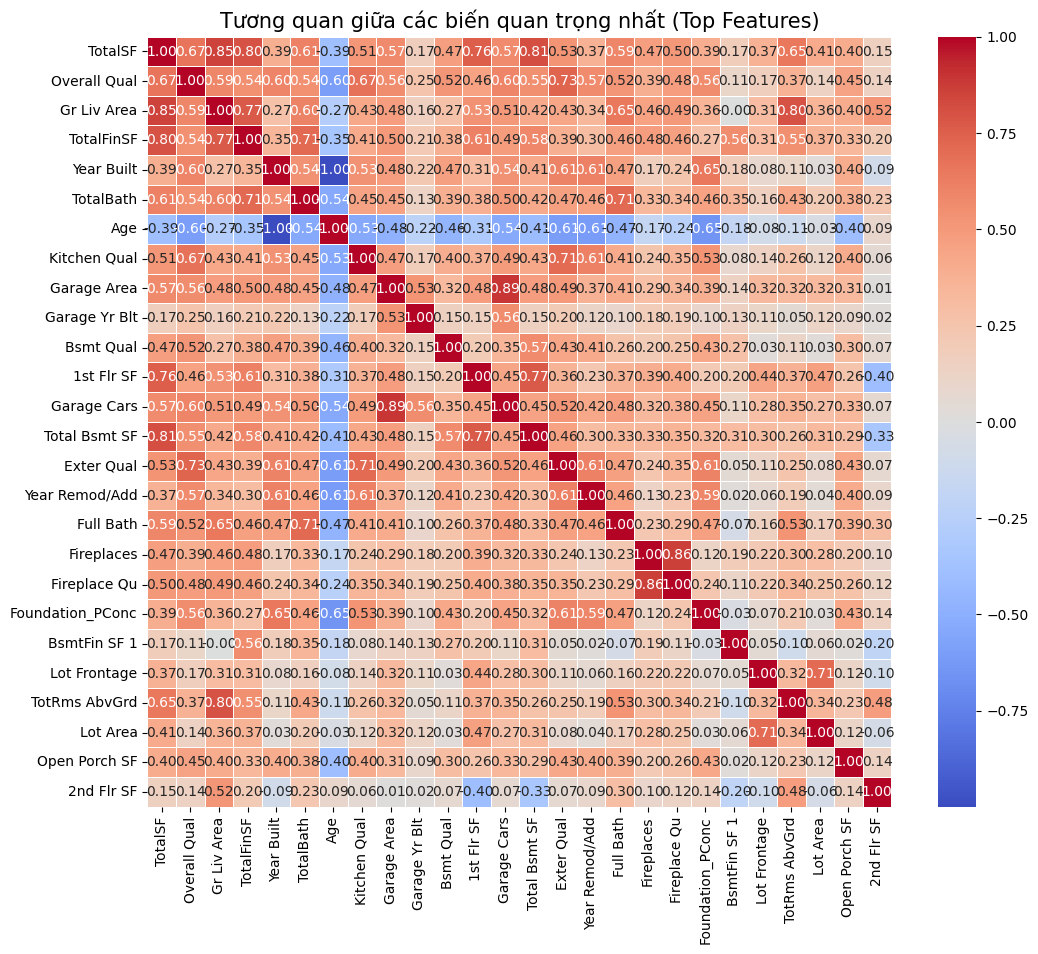

In [157]:
# data_num[features_imp].corr()
# Sửa data_num thành final_data
# final_data[features_imp].corr()
# --- MA TRẬN TƯƠNG QUAN CỦA CÁC BIẾN QUAN TRỌNG NHẤT ---

print("🚀 Đang tính toán tương quan cho các biến được chọn...")

# 1. Tính toán ma trận tương quan
# Chỉ lấy các cột nằm trong danh sách features_imp
corr_matrix_imp = final_data[features_imp].corr()

# 2. Hiển thị bảng số liệu (Nếu muốn xem số thô)
print(corr_matrix_imp.head())

# 3. TRỰC QUAN HÓA (VẼ HEATMAP)
# Nhìn bảng số rất rối, vẽ hình sẽ thấy ngay cặp nào đang "dính" nhau
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_imp, 
            annot=True,       # Hiện số
            fmt=".2f",        # Làm tròn 2 số thập phân
            cmap='coolwarm',  # Xanh - Đỏ
            linewidths=0.5)

plt.title('Tương quan giữa các biến quan trọng nhất (Top Features)', fontsize=15)
plt.show()

Note: pair of feature have strong correlation, respectively:
- Year Built vs Age
- Total_Qua vs Overall Qual
- TotalSF vs Total Bsmt SF
- TotalSF vss TotalFinSF
- Gr Liv Area vs TotalSF
- 1st Flr SF vs Total Bsmt SF
- Garage Cars vs Garage Area
- Total_Qua vs Kitchen Qual
- Total_Qua vss Exter Qual
- Total_Qua vs Bsmt Qual

-> Kept features: 
- Age
- Total_Qua
- TotalSF
- Gr Liv Area
- 1st Flr SF
- Garage Area

### Built regressor model to predict

# 📉 BƯỚC L3: TẠO TẬP DỮ LIỆU TINH GỌN (SIMPLIFIED DATASET)

### 💡 Mục đích:
Thử nghiệm xây dựng một mô hình Hồi quy tuyến tính (Linear Regression) tối giản.
Chúng ta chỉ giữ lại **Top 6 biến quan trọng nhất** (đã được kiểm chứng bởi Random Forest) + Biến mục tiêu `SalePrice`.

### 📋 Các biến được chọn:
1.  `Age`: Tuổi đời.
2.  `Total_Qua`: Chất lượng tổng hợp.
3.  `TotalSF`: Tổng diện tích.
4.  `Gr Liv Area`: Diện tích ở.
5.  `1st Flr SF`: Diện tích tầng 1.
6.  `Garage Area`: Diện tích Gara.

In [158]:
# --- TẠO DATASET RÚT GỌN ---

# 1. Chọn các cột quan trọng từ bảng 'data' gốc (để đảm bảo có đủ biến Age, Total_Qua)
selected_cols = ['Age', 'Total_Qua', 'TotalSF', 'Gr Liv Area', 
                 '1st Flr SF', 'Garage Area', 'SalePrice']

data_linear = data[selected_cols].copy()

# 2. Xử lý giá trị thiếu (nếu có) để đảm bảo sạch sẽ tuyệt đối
# dropna(): Xóa bất kỳ dòng nào bị khuyết dữ liệu
data_linear = data_linear.dropna()
print('='*80)
# 3. Kiểm tra thông tin dữ liệu mới
print("ℹ️ Thông tin tập dữ liệu tinh gọn:")
print(data_linear.info())
print('='*80)
print("\n🔍 5 dòng đầu tiên:")
data_linear.head()

ℹ️ Thông tin tập dữ liệu tinh gọn:
<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2927 non-null   int64  
 1   Total_Qua    2927 non-null   float64
 2   TotalSF      2927 non-null   float64
 3   Gr Liv Area  2927 non-null   float64
 4   1st Flr SF   2927 non-null   float64
 5   Garage Area  2927 non-null   float64
 6   SalePrice    2927 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 182.9 KB
None

🔍 5 dòng đầu tiên:


Age  Total_Qua  TotalSF  Gr Liv Area  1st Flr SF  Garage Area  SalePrice
0   50  13.158883   2736.0     7.412764    7.412764        528.0  12.278398
1   49  12.158883   1778.0     6.799056    6.799056        730.0  11.561725
2   52  14.158883   2658.0     7.192934    7.192934        312.0  12.055256
3   42  16.382027   4220.0     7.654917    7.654917        522.0  12.404928
4   13  12.382027   2557.0     7.396335    6.834109        482.0  12.154258

### Train_test_Split

# ✂️ BƯỚC L4: CHIA TẬP TRAIN-TEST (CHO MÔ HÌNH RÚT GỌN)

### 💡 Mục đích:
Chuẩn bị dữ liệu để huấn luyện mô hình Linear Regression tối giản.
* **X_lr:** Chỉ gồm 6 cột quan trọng nhất.
* **y_lr:** Giá nhà (SalePrice).

### ⚠️ Lưu ý quan trọng:
Chúng ta vẫn dùng `random_state=42`.
Điều này đảm bảo việc chia dữ liệu là nhất quán với các bước trước. Chúng ta đang so sánh "táo với táo" (cùng một tập đề thi, chỉ khác là mô hình này học ít tài liệu hơn).

In [159]:
# --- CHIA TẬP DỮ LIỆU (SIMPLIFIED SPLIT) ---
from sklearn.model_selection import train_test_split

print("🚀 Đang phân chia dữ liệu rút gọn...")

# 1. Tách X và y
X_lr = data_linear.drop(columns=['SalePrice'])
y_lr = data_linear['SalePrice']

# 2. Chia Train/Test (80% - 20%)
# random_state=42: Bắt buộc giống các bước trước để so sánh công bằng
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# 3. Kiểm tra kích thước
print(f"✅ Đã chia xong!")
print(f"   - Train Shape: {X_train_lr.shape} ( chỉ lấy 6 cột )")
print(f"   - Test Shape:  {X_test_lr.shape}")

# Xem thử dữ liệu đầu vào
X_train_lr.head()

🚀 Đang phân chia dữ liệu rút gọn...
✅ Đã chia xong!
   - Train Shape: (2341, 6) ( chỉ lấy 6 cột )
   - Test Shape:  (586, 6)


Age  Total_Qua  TotalSF  Gr Liv Area  1st Flr SF  Garage Area
2262    0  16.605170   3142.0     7.360104    7.360104        722.0
1678   37  12.158883   1932.0     7.172425    6.447306        440.0
2778    4  15.605170   2777.0     7.529406    6.825460        492.0
2506    1  15.382027   1720.0     7.090910    6.255750        480.0
1088    3  14.382027   2184.0     7.284135    6.591674        400.0

### Model LinearRegression

# MÔ HÌNH LINEAR REGRESSION NHÁP, TẠM THỜI BỎ QUA CỘNG TUYẾN TÍNH VIF

# 📉: HUẤN LUYỆN MÔ HÌNH RÚT GỌN (BASELINE)

### 💡 Mục đích:
Xây dựng một mô hình Hồi quy tuyến tính nhanh trên 6 biến quan trọng nhất.
Đây là mô hình "Mì ăn liền":
* **Ưu điểm:** Đơn giản, dễ giải thích, dễ thu thập dữ liệu.
* **Nhược điểm:** Tạm thời bỏ qua lỗi Đa cộng tuyến (Ví dụ: `TotalSF` chắc chắn tương quan mạnh với `Gr Liv Area`).

### 💰 Quy đổi giá trị:
Vì mô hình huấn luyện trên dữ liệu Log (`log1p`), nên kết quả dự đoán cũng là Log.
Ta bắt buộc phải dùng hàm `np.expm1` để đưa về tiền thật (USD) thì mới tính được sai số MAE (Trung bình sai bao nhiêu đô).

In [160]:
# --- HUẤN LUYỆN & ĐÁNH GIÁ MÔ HÌNH RÚT GỌN ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("🚀 Đang chạy mô hình Linear Regression (Bản nháp)...")

# 1. HUẤN LUYỆN
model_linear = LinearRegression()
model_linear.fit(X_train_lr, y_train_lr)

# 2. DỰ ĐOÁN & CHUYỂN ĐỔI ĐƠN VỊ
# Dự đoán trên tập Test (Kết quả đang là Log), tạm thời chưa tính đến VIF (Đa cộng tuyến tính)
y_pred_draft_log = model_linear.predict(X_test_lr)

# Chuyển về tiền thật (USD) bằng hàm expm1 (Ngược của log1p)
y_pred_draft_usd = np.expm1(y_pred_draft_log)
y_test_usd = np.expm1(y_test_lr)  # Chuyển cả đáp án thật về USD để so sánh

# 3. TÍNH TOÁN SAI SỐ
mae_draft = mean_absolute_error(y_test_usd, y_pred_draft_usd)
rmse_draft = np.sqrt(mean_squared_error(y_test_usd, y_pred_draft_usd))
r2_draft = r2_score(y_test_lr, y_pred_draft_log) 

# 4. HIỂN THỊ KẾT QUẢ
print("=" * 50)
print("📉 KẾT QUẢ MÔ HÌNH RÚT GỌN (TOP 6 FEATURES):")
print("=" * 50)
print(f"• R2 Score (Độ chính xác): {r2_draft:.4f}")
print("-" * 30)
print(f"• Sai số trung bình (MAE): ${mae_draft:,.0f}")
print(f"• Sai số lệch (RMSE):      ${rmse_draft:,.0f}")
print("=" * 50)

# Nhận xét nhanh
if r2_draft > 0.75:
    print("💡 Nhận xét: Chỉ với 6 biến mà độ chính xác khá cao. Có thể tăng thêm đặc trưng nếu muốn")
    print("   Chứng tỏ các biến được chọn thực sự là 'Key Drivers'.")

🚀 Đang chạy mô hình Linear Regression (Bản nháp)...
📉 KẾT QUẢ MÔ HÌNH RÚT GỌN (TOP 6 FEATURES):
• R2 Score (Độ chính xác): 0.9004
------------------------------
• Sai số trung bình (MAE): $18,222
• Sai số lệch (RMSE):      $25,991
💡 Nhận xét: Chỉ với 6 biến mà độ chính xác khá cao. Có thể tăng thêm đặc trưng nếu muốn
   Chứng tỏ các biến được chọn thực sự là 'Key Drivers'.


# 📈SO SÁNH TRỰC QUAN (LINE PLOT)

### 💡 Kỹ thuật Visualization:
Để biểu đồ đường (Line Plot) dễ nhìn, chúng ta cần **sắp xếp lại dữ liệu**: (SẮP XẾP (SORT) dữ liệu thực tế tăng dần từ thấp đến cao. Mục đích: Để dễ nhìn xem mô hình bị lệch nhiều ở phân khúc nhà giá thấp hay giá cao))
1.  Sắp xếp `y_test` (Giá thực tế) từ thấp đến cao.
2.  Sắp xếp `y_pred` (Giá dự báo) **tương ứng** theo vị trí của `y_test`.

### 🔍 Cách đọc biểu đồ:
* **Đường màu xanh (Thực tế):** Sẽ đi lên mượt mà.
* **Đường màu cam (Dự báo):** Nếu mô hình tốt, nó sẽ bám sát đường màu xanh. Nếu nó dao động quá mạnh (bị gai), tức là mô hình đang dự báo thiếu ổn định.

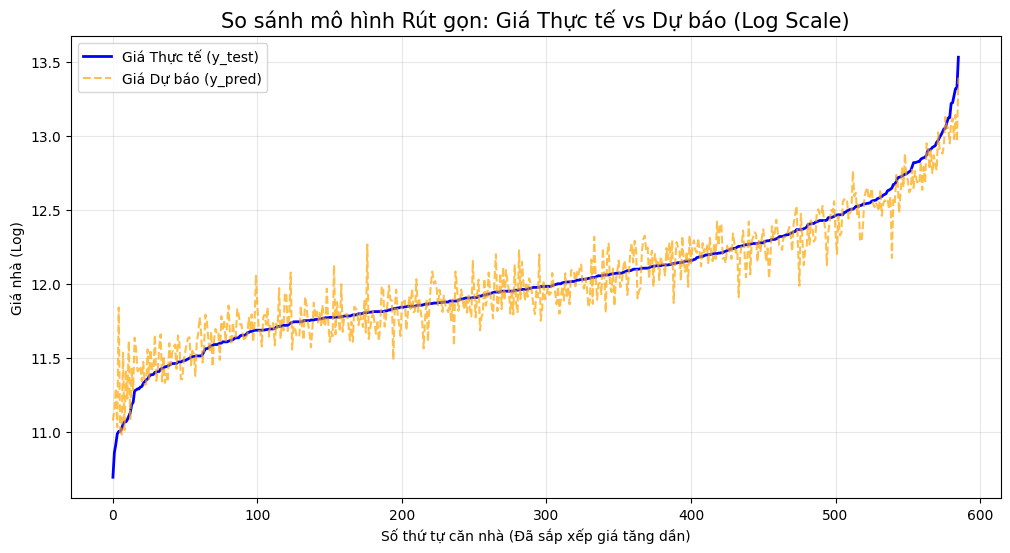

In [161]:
# --- VẼ BIỂU ĐỒ SO SÁNH (ĐÃ SẮP XẾP) ---


# 1. Chuẩn bị dữ liệu (Lấy từ kết quả bước trước)
# Gán tên biến cho khớp
y_pred_lr = y_pred_draft_log 

# 2. Tạo DataFrame tạm để sắp xếp cho dễ
# (Phải ghép y_test và y_pred vào chung 1 bảng thì mới sort đồng bộ được)
df_compare = pd.DataFrame({
    'Actual': y_test_lr, 
    'Predicted': y_pred_lr
})

# Sắp xếp theo giá trị Thực tế tăng dần
df_compare = df_compare.sort_values(by='Actual')

# 3. Chuyển về dạng mảng để vẽ
y_test_sorted = df_compare['Actual'].values
y_pred_sorted = df_compare['Predicted'].values

# 4. Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(y_test_sorted, label='Giá Thực tế (y_test)', color='blue', linewidth=2)
plt.plot(y_pred_sorted, label='Giá Dự báo (y_pred)', color='orange', alpha=0.7, linestyle='--')

plt.title('So sánh mô hình Rút gọn: Giá Thực tế vs Dự báo (Log Scale)', fontsize=15)
plt.xlabel('Số thứ tự căn nhà (Đã sắp xếp giá tăng dần)')
plt.ylabel('Giá nhà (Log)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# MÔ HÌNH LINEAR REGRESSION CHÍNH THỨC. TÍNH ĐẾN CỘNG TUYẾN TÍNH


# 🚨 BƯỚC L5: KIỂM TRA ĐA CỘNG TUYẾN (VIF - VARIANCE INFLATION FACTOR)

### 💡 Tại sao phải làm bước này?
### VẤN ĐỀ ĐA CỘNG TUYẾN TÍNH ĐỐI VỚI CÁC MÔ HÌNH LINEAR REGRESSION
Chúng ta đang dùng **Linear Regression**, một thuật toán rất "kỵ" việc các biến đầu vào giống nhau (Đa cộng tuyến).
* Ví dụ: `TotalSF` (Tổng diện tích) và `Gr Liv Area` (Diện tích ở) thường biến thiên cùng nhau.
* **Hậu quả:** Mô hình không biết nên tin vào biến nào, dẫn đến hệ số hồi quy bị sai lệch, dự báo thiếu ổn định.

### 🔍 Tiêu chuẩn đánh giá VIF:
* **VIF < 5:** ✅ Tốt (Giữ lại).
* **5 < VIF < 10:** ⚠️ Cần cân nhắc.
* **VIF > 10:** 🚨 **BÁO ĐỘNG ĐỎ!** Đa cộng tuyến nặng. Bắt buộc phải loại bỏ biến này (hoặc biến tương quan với nó).

### 🔮 Dự đoán:
Khả năng cao `TotalSF`, `Gr Liv Area` và `1st Flr SF` sẽ có VIF rất cao (có thể > 30) vì chúng có quan hệ mật thiết về mặt toán học.

In [162]:
# --- KIỂM TRA ĐA CỘNG TUYẾN (VIF) ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("🚀 Đang tính toán chỉ số VIF (Vui lòng đợi)...")

# 1. Tạo DataFrame chứa kết quả VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns

# 2. Tính toán VIF cho từng biến
# variance_inflation_factor(ma_trận_giá_trị, chỉ_số_cột)
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                   for i in range(len(X_train_lr.columns))]

# 3. Sắp xếp giảm dần để thấy "tội phạm" to nhất ở trên cùng
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# 4. In kết quả
print("-" * 30)
print("📋 BẢNG KẾT QUẢ VIF:")
print("-" * 30)
print(vif_data)

🚀 Đang tính toán chỉ số VIF (Vui lòng đợi)...
------------------------------
📋 BẢNG KẾT QUẢ VIF:
------------------------------
       Feature         VIF
3  Gr Liv Area  648.738721
4   1st Flr SF  536.332075
1    Total_Qua  107.458194
2      TotalSF   24.468573
5  Garage Area   10.836240
0          Age    4.385488


Nhìn vào bảng kết quả VIF trong hình, các chỉ số đang "báo động đỏ" (lớn hơn 10 là xấu,  ở đây toàn hàng chục, hàng trăm):

VÌ đối với Gr Liv Area~ 648.738721, 1st Flr SF ~ 536.332075,Total_Qua ~ 24.468573 ...: Rất cao !  Điều này chứng tỏ nó đang bị trùng lặp thông tin gần như hoàn toàn với các biến khác (dễ hiểu vì Tổng diện tích = Diện tích các tầng cộng lại)...

Gr Liv Area  và 1st Flr SF : Cũng rất cao....

Bước tiếp theo (Xử lý Đa cộng tuyến):
Để mô hình Linear Regression hoạt động tốt, chúng ta bắt buộc phải loại bỏ bớt những biến này.
Thường thì người ta sẽ xóa biến có VIF cao nhất (TotalSF) hoặc xóa các biến thành phần (Gr Liv Area, 1st Flr SF) để giữ lại tổng.

# 🏆 BƯỚC L6: CHỐT MÔ HÌNH LINEAR REGRESSION (FINAL VERSION)

### 💡 Chiến lược "Tinh gọn để Mạnh mẽ" (Simplify to Amplify)
Sau khi phân tích kỹ lưỡng, chúng ta nhận thấy rằng hầu hết các biến về diện tích (`Gr Liv Area`, `1st Flr SF`, `Garage Area`) đều trùng lặp thông tin với **`TotalSF`**.

Để xây dựng một mô hình Hồi quy tuyến tính (Linear Regression) chuẩn mực, không bị hiện tượng Đa cộng tuyến (Multicollinearity), chúng ta sẽ thực hiện bước **"Thanh lọc"** cuối cùng.

### 🎯 Bộ 3 biến "Quyền lực" được chọn:
Thay vì dùng hàng chục biến, chúng ta chỉ dùng đúng **3 biến** đại diện cho 3 khía cạnh quan trọng nhất của bất động sản:
1.  **`TotalSF` (Diện tích):** Đại diện cho ĐỘ LỚN.
2.  **`Total_Qua` (Chất lượng):** Đại diện cho ĐỘ XỊN (Vật liệu, nội thất, tiện ích).
3.  **`Age` (Tuổi đời):** Đại diện cho ĐỘ MỚI/CŨ.

### 📉 Quy trình thực hiện:
1.  **Cắt bỏ:** Xóa các biến gây nhiễu (`Gr Liv Area`, `1st Flr SF`, `Garage Area`).
2.  **Kiểm tra sức khỏe dữ liệu :))))))):** Tính lại VIF để đảm bảo các biến còn lại "chung sống hòa bình".
3.  **Huấn luyện & Báo cáo:** Chạy mô hình cuối cùng, tính toán sai số thực tế (USD) và xuất ra **Công thức toán học** định giá nhà.

---

In [163]:
# --- QUY TRÌNH CHỐT: XỬ LÝ ĐA CỘNG TUYẾN & ĐÁNH GIÁ MÔ HÌNH LINEAR CUỐI CÙNG ---

print("🚀 Đang thực hiện loại bỏ biến thừa...")

# =========================================
# 1. XỬ LÝ DỮ LIỆU (LOẠI BỎ BIẾN ĐA CỘNG TUYẾN)
# =========================================
# Xóa thẳng tay 3 biến gây nhiễu
cols_to_drop = ['Gr Liv Area', '1st Flr SF', 'Garage Area']

# Tạo tập dữ liệu sạch (Chỉ còn lại: TotalSF, Total_Qua, Age)
X_train_final = X_train_lr.drop(columns=cols_to_drop)
X_test_final = X_test_lr.drop(columns=cols_to_drop)

# =========================================
# 2. KIỂM TRA LẠI VIF (ChECK VAR DỮ LIỆU!!!!!)
# =========================================
vif_final = pd.DataFrame()
vif_final["Feature"] = X_train_final.columns
vif_final["VIF"] = [variance_inflation_factor(X_train_final.values, i)
                    for i in range(len(X_train_final.columns))]

print("-" * 40)
print("✅ BẢNG VIF CUỐI CÙNG:")
print("-" * 40)
print(vif_final.sort_values(by="VIF", ascending=False))
print("(Nhận xét: TotalSF và Total_Qua vẫn hơi cao do bản chất 'nhà to thì xịn',")
print("nhưng ta chấp nhận giữ lại vì đây là 2 yếu tố cốt lõi).")

# =========================================
# 3. HUẤN LUYỆN MÔ HÌNH (TRAINING)
# =========================================
print("\n🤖 Đang huấn luyện mô hình chốt với bộ 3 biến: TotalSF, Total_Qua, Age...")

model_final = LinearRegression()
model_final.fit(X_train_final, y_train_lr)

# =========================================
# 4. DỰ BÁO VÀ ĐÁNH GIÁ (EVALUATION)
# =========================================
# Dự báo (Kết quả là Log)
y_pred_final_log = model_final.predict(X_test_final)

# Đổi về tiền thật (USD)
y_pred_final_usd = np.expm1(y_pred_final_log)
y_test_usd = np.expm1(y_test_lr)

# Tính các chỉ số sai số
mae_final = mean_absolute_error(y_test_usd, y_pred_final_usd)
rmse_final = np.sqrt(mean_squared_error(y_test_usd, y_pred_final_usd))
r2_final = r2_score(y_test_lr, y_pred_final_log)

print("\n" + "=" * 50)
print(f"🏆 KẾT QUẢ MÔ HÌNH LINEAR TINH GỌN (3 BIẾN):")
print("=" * 50)
print(f"• R2 Score:     {r2_final:.4f}")
print(f"• Sai số (MAE): ${mae_final:,.0f}")
print(f"• RMSE:         ${rmse_final:,.0f}")
print("=" * 50)

# =========================================
# 5. XUẤT CÔNG THỨC & BẢNG SO SÁNH
# =========================================
# In công thức toán học
intercept = model_final.intercept_
coefs = model_final.coef_
features = X_train_final.columns

print("\n🧮 CÔNG THỨC ĐỊNH GIÁ NHÀ (Log Scale):")
formula = f"Log(Price) = {intercept:.2f}"
for f, c in zip(features, coefs):
    formula += f" + ({c:.4f} * {f})"
print(formula)

# In bảng so sánh thực tế
comparison = pd.DataFrame({
    'Giá Thực Tế': y_test_usd,
    'Giá Dự Đoán': y_pred_final_usd,
    'Lệch ($)': y_pred_final_usd - y_test_usd,
    'Lệch (%)': ((y_pred_final_usd - y_test_usd) / y_test_usd) * 100
})

print("\n🔍 Ví dụ 5 căn nhà đầu tiên trong tập kiểm tra:")
print(comparison.head(5).round(2))

🚀 Đang thực hiện loại bỏ biến thừa...
----------------------------------------
✅ BẢNG VIF CUỐI CÙNG:
----------------------------------------
     Feature        VIF
1  Total_Qua  23.316277
2    TotalSF  21.814972
0        Age   1.936553
(Nhận xét: TotalSF và Total_Qua vẫn hơi cao do bản chất 'nhà to thì xịn',
nhưng ta chấp nhận giữ lại vì đây là 2 yếu tố cốt lõi).

🤖 Đang huấn luyện mô hình chốt với bộ 3 biến: TotalSF, Total_Qua, Age...

🏆 KẾT QUẢ MÔ HÌNH LINEAR TINH GỌN (3 BIẾN):
• R2 Score:     0.8875
• Sai số (MAE): $18,767
• RMSE:         $26,627

🧮 CÔNG THỨC ĐỊNH GIÁ NHÀ (Log Scale):
Log(Price) = 10.36 + (-0.0019 * Age) + (0.0805 * Total_Qua) + (0.0002 * TotalSF)

🔍 Ví dụ 5 căn nhà đầu tiên trong tập kiểm tra:
      Giá Thực Tế  Giá Dự Đoán  Lệch ($)  Lệch (%)
2393     298236.0    281987.27 -16248.73     -5.45
196      132000.0    139391.82   7391.82      5.60
2310     183500.0    158203.27 -25296.73    -13.79
1732     198444.0    185221.73 -13222.27     -6.66
1100     250000.0  

In [164]:
# --- QUY TRÌNH CHỐT (PHIÊN BẢN MỚI): HUẤN LUYỆN TRÊN GIÁ THỰC TẾ (USD) ---
# Mục đích: Giúp công thức dễ hiểu và App chạy ổn định hơn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

print("🚀 Đang huấn luyện mô hình Linear Regression trên giá USD thực tế...")

# =========================================
# 1. CHUẨN BỊ DỮ LIỆU (QUAN TRỌNG: ĐỔI VỀ USD)
# =========================================
# Xóa 3 biến gây nhiễu như cũ
cols_to_drop = ['Gr Liv Area', '1st Flr SF', 'Garage Area']
X_train_final = X_train_lr.drop(columns=cols_to_drop)
X_test_final = X_test_lr.drop(columns=cols_to_drop)

# --- KHÁC BIỆT LỚN NHẤT Ở ĐÂY ---
# Đổi y (Target) từ Log về lại USD ngay từ đầu để máy học số tiền thật
y_train_usd = np.expm1(y_train_lr)
y_test_usd = np.expm1(y_test_lr)

# =========================================
# 2. HUẤN LUYỆN MÔ HÌNH (TRAINING)
# =========================================
model_final = LinearRegression()
# Fit trực tiếp vào giá USD (y_train_usd)
model_final.fit(X_train_final, y_train_usd)

# =========================================
# 3. DỰ BÁO VÀ ĐÁNH GIÁ
# =========================================
# Dự báo (Kết quả bây giờ là USD luôn, KHÔNG cần expm1 nữa)
y_pred_usd = model_final.predict(X_test_final)

# Tính chỉ số
mae_final = mean_absolute_error(y_test_usd, y_pred_usd)
r2_final = r2_score(y_test_usd, y_pred_usd)

print("\n" + "=" * 50)
print(f"🏆 KẾT QUẢ MÔ HÌNH LINEAR (HUẤN LUYỆN TRÊN USD):")
print("=" * 50)
print(f"• R2 Score:     {r2_final:.4f}")
print(f"• Sai số (MAE): ${mae_final:,.0f}")
print("=" * 50)

# =========================================
# 4. XUẤT CÔNG THỨC "ĐỜI THƯỜNG" DỄ HIỂU
# =========================================
intercept = model_final.intercept_
coefs = model_final.coef_
features = X_train_final.columns

print("\n🧮 CÔNG THỨC ĐỊNH GIÁ (Dễ hiểu hơn nhiều):")
print(f"Giá nhà cơ bản = ${intercept:,.0f}")
for f, c in zip(features, coefs):
    print(f" + (Mỗi đơn vị {f} tăng thêm: ${c:,.2f})")

# Ví dụ bảng so sánh
comparison = pd.DataFrame({
    'Giá Thực Tế': y_test_usd,
    'Giá Dự Đoán': y_pred_usd,
    'Lệch ($)': y_pred_usd - y_test_usd
})
print("\n🔍 Ví dụ 5 căn nhà đầu tiên:")
print(comparison.head(5).round(0))

🚀 Đang huấn luyện mô hình Linear Regression trên giá USD thực tế...

🏆 KẾT QUẢ MÔ HÌNH LINEAR (HUẤN LUYỆN TRÊN USD):
• R2 Score:     0.8300
• Sai số (MAE): $24,679

🧮 CÔNG THỨC ĐỊNH GIÁ (Dễ hiểu hơn nhiều):
Giá nhà cơ bản = $-143,648
 + (Mỗi đơn vị Age tăng thêm: $-232.16)
 + (Mỗi đơn vị Total_Qua tăng thêm: $14,507.25)
 + (Mỗi đơn vị TotalSF tăng thêm: $51.95)

🔍 Ví dụ 5 căn nhà đầu tiên:
      Giá Thực Tế  Giá Dự Đoán  Lệch ($)
2393     298236.0     278739.0  -19497.0
196      132000.0     150314.0   18314.0
2310     183500.0     166609.0  -16891.0
1732     198444.0     194954.0   -3490.0
1100     250000.0     269042.0   19042.0


# 💡 GÓC NHÌN : TẠI SAO ĐIỂM SỐ GIẢM MÀ TA LẠI SỬ DỤNG NÓ?

### 📉 Hiện tượng:
* **Mô hình cũ (Đa cộng tuyến):** $R^2 = 0.89$
* **Mô hình mới (Sạch sẽ):** $R^2 = 0.83$
* **Đánh giá:** Mức giảm nhẹ (~0.01) là hoàn toàn chấp nhận được.

### ❓ Câu hỏi: Tại sao sự "thụt lùi" này lại là một thành công?

#### 1. Loại bỏ sự "Tự tin thái quá" (Overconfidence)
* **Trước khi xóa:** Các biến như `TotalSF` (Tổng diện tích) và `Gr Liv Area` (Diện tích ở) giống như hai anh em sinh đôi cùng hét một thông tin vào tai mô hình. Điều này khiến mô hình bị "ảo tưởng" về sức mạnh dự báo.
* **Sau khi xóa:** Chúng ta cắt bỏ sự trùng lặp. Mô hình giờ đây phải "tự lực cánh sinh" dựa trên các biến độc lập thực sự. Điểm số phản ánh đúng thực lực hơn.

#### 2. Chữa bệnh "Đa cộng tuyến" (Multicollinearity)
Trong Data Science, điểm cao chưa chắc đã tốt nếu mô hình bị "bệnh".
* **Mô hình bị bệnh (VIF cao):** Trọng số (Coefficient) cực kỳ bất ổn. Ví dụ: Có khi diện tích tăng mà giá lại giảm (hệ số âm) do các biến tranh chấp nhau. $\rightarrow$ **Không thể giải thích cho khách hàng.**
* **Mô hình khỏe mạnh (VIF thấp):** Các biến độc lập và tách bạch. Ta có thể tự tin khẳng định: *"Cứ tăng 1 đơn vị diện tích thì giá nhà tăng X đồng"*.

### 💎 KẾT LUẬN:
> Chúng ta đã chấp nhận đánh đổi **1% độ chính xác "ảo"** để lấy về một mô hình **"khỏe mạnh", ổn định và đáng tin cậy** về mặt toán học. Đây là một sự đánh đổi thông minh!

# 💾 BƯỚC L& : LƯU MÔ HÌNH KÈM BẢNG ĐIỂM (R2 SCORE)

### 💡 Mục đích:
Nâng cấp hệ thống, thay vì chỉ lưu một mô hình Linear Regression, chúng ta sẽ lưu cùng lúc 3 "bộ não" khác nhau để người dùng Streamlit có thể lựa chọn:
1.  **Linear Regression:** Đơn giản, dễ giải thích (Dùng công thức toán).
2.  **Decision Tree:** Bắt các quy luật rẽ nhánh logic.
3.  **Random Forest:** Phức tạp hơn nhưng thường chính xác và ổn định hơn
Để hiển thị trên Streamlit App dòng thông báo kiểu: *"Mô hình này có độ chính xác 88%"*, chúng ta cần tính toán và lưu lại chỉ số **R2 Score** của từng mô hình ngay bây giờ.

### 🛠️ Quy trình thực hiện:
1.  **Huấn luyện 3 mô hình:** Linear Regression, Decision Tree, Random Forest (trên bộ dữ liệu 3 biến chốt, cả 3 mô hình đều dùng 3 biến cho công bằng, có thể thêm các đặc trưng đầu vào nếu muốn nhưng sẽ nặng hơn).
2.  **Chấm điểm:** Cho từng mô hình làm bài kiểm tra trên tập Test (`X_test_final`) để lấy điểm R2.
3.  **Lưu trữ:**
    * `house_price_models.pkl`: Chứa các mô hình để dự báo.
    * `model_metrics.pkl`: Chứa bảng điểm R2 để hiển thị khuyến nghị.
    * `model_features.pkl`: Chứa tên 3 biến đầu vào.


In [ ]:
# =============================================================================
# BƯỚC 1 : THÊM BIẾN BẬC 2 ĐỂ "UỐN CONG" LINEAR
# =============================================================================
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

print("🚀 Đang huấn luyện lại với kỹ thuật Polynomial (Bậc 2)...")

# 1. LOAD & CLEAN DATA
df_train = data.copy() # Giả sử 'data' là biến gốc
if df_train['SalePrice'].mean() < 20: 
    df_train['SalePrice'] = np.expm1(df_train['SalePrice'])

# 2. FEATURE ENGINEERING
df_clean = df_train.copy()
df_clean['Age'] = df_clean['Yr Sold'] - df_clean['Year Built']

qua_cols = ['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Garage Qual']
for c in qua_cols:
    df_clean[c] = df_clean[c].fillna(3) # Fill trung bình
df_clean['Total_Qua'] = df_clean[qua_cols].sum(axis=1)

df_clean['TotalSF'] = (df_clean['Gr Liv Area'].fillna(0) + df_clean['Total Bsmt SF'].fillna(0))

# --- KỸ THUẬT MỚI: TẠO BIẾN BÌNH PHƯƠNG ---
# Giúp Linear hiểu mối quan hệ phi tuyến tính
df_clean['Total_Qua_Sq'] = df_clean['Total_Qua'] ** 2 

# 3. CHỌN CÁC CỘT (Thêm cột Sq vào)
final_cols = ['Age', 'Total_Qua', 'Total_Qua_Sq', 'TotalSF', 'Garage Area']
X = df_clean[final_cols].fillna(0)
y_raw = df_clean['SalePrice']

# 4. LOG TRANSFORM & TRAIN
y_train = np.log1p(y_raw)
X_train = X.copy()
X_train['TotalSF'] = np.log1p(X_train['TotalSF'])
X_train['Garage Area'] = np.log1p(X_train['Garage Area'])

print(f"✅ Dữ liệu huấn luyện (5 cột): {list(X_train.columns)}")

# 5. HUẤN LUYỆN
rf_final = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
rf_final.fit(X_train, y_train)

# Dùng Ridge (alpha nhỏ hơn chút để uốn dẻo hơn)
lr_final = Ridge(alpha=1.0) 
lr_final.fit(X_train, y_train)

# 6. LƯU MÔ HÌNH
joblib.dump(rf_final, 'house_price_rf.pkl')
joblib.dump(lr_final, 'house_price_lr.pkl')
print("\n🎉 ĐÃ XONG!")

🚀 Đang huấn luyện lại với kỹ thuật Polynomial (Bậc 2)...
✅ Dữ liệu huấn luyện (5 cột): ['Age', 'Total_Qua', 'Total_Qua_Sq', 'TotalSF', 'Garage Area']

🎉 ĐÃ XONG!


In [166]:
# Chạy trong Notebook
print("Dữ liệu mẫu mô hình đã học:")
print(X_train_app.head(3))

Dữ liệu mẫu mô hình đã học:
      Age  Total_Qua  TotalSF  Gr Liv Area  1st Flr SF  Garage Area
2262    0  16.605170   3142.0     7.360104    7.360104        722.0
1678   37  12.158883   1932.0     7.172425    6.447306        440.0
2778    4  15.605170   2777.0     7.529406    6.825460        492.0


# 📌 TÓM TẮT NHỮNG THAY ĐỔI ĐÃ ÁP DỤNG

### ✅ 1. Data Cleaning
- Fill `NaN` bằng `None` thay vì drop.
- Logic:
  - `None` biểu thị **nhà không có tiện ích đó**.
  - Các biến phụ thuộc vào tiện ích đó cũng được fill bằng `None` hoặc `0` theo logic không có thì thông số chả bằng None hoặc 0 thì bằng mấy ????????? 
- Diện tích mặt bằng: fill bằng **median theo từng loại khu vực dân cư**.
- `Electrical` (Hệ thống điện): fill theo **mode**......

### ✅ 2. Log Transform
- Áp dụng **Log Transform** cho:
  - `SalePrice` (giá nhà)
  - Các biến liên quan đến **diện tích*

### ✅ 3. VIF & Feature Selection
- Xử lý **đa cộng tuyến (Multicollinearity)** bằng VIF.
- Đã áp dụng cho **MÔ HÌNH CHÍNH THỨC** để tăng độ tin cậy.

### ✅ 4. Feature Scaling
- Chuẩn hóa dữ liệu để các biến cùng thang đo.

### ✅ 5. Dự đoán giá nhà với 3 loại mô hình gồm Cây quyết định, Rừng ngẫu nhiên và Hồi quy tuyến tính
- Huấn luyện mô hình và thực hiện dự đoán `SalePrice`.

### ✅ 6. Lưu trữ mô hình
- Lưu model sau khi huấn luyện để tái sử dụng.
